In [1]:
# 0) imprt important lib(modules)
# 1) Input embedding
# 2) positional encoding
# 3) mutlihead attention(self attention)
# 4) add and norm
# 5) feed forward network
# 6) residual connecction
# 7) encoder
# 8) decoder
# 9) building a transformer
# 10)test our transformer
# 11)tokenizer
# 12)loading a dataset
# 13) validation loop
# 14)training loop
# 15) conclusion

In [2]:
#***0. import important libraries ***

In [3]:
# all the important libraries from pytorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader, random_split
from torch.utils.tensorboard import SummaryWriter


import math


#HuggingFace linraries
from datasets import load_dataset
from tokenizers import Tokenizer
from tokenizers.models import WordLevel
from tokenizers.trainers import WordLevelTrainer
from tokenizers.pre_tokenizers import Whitespace


#pathlib
from pathlib import Path


#typing
from typing import Any


#Library for progress bars in loops
from tqdm import tqdm


#importing library of warnings
import warnings

In [4]:
# 1. Input embedding

In [5]:
# Creating Input Embeddings
class InputEmbeddings(nn.Module):

    def __init__(self, d_model: int, vocab_size: int):
        super().__init__()
        self.d_model = d_model # Dimension of vectors (512)
        self.vocab_size = vocab_size # Size of the vocabulary
        self.embedding = nn.Embedding(vocab_size, d_model) # PyTorch layer that converts integer indices to dense embeddings

    def forward(self, x):
        return self.embedding(x) * math.sqrt(self.d_model) # Normalizing the variance of the embedding


In [6]:
d_model=512
vocab_size=10
max_sequence_length=11

In [7]:
pe = torch.zeros(max_sequence_length, d_model)
pe

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [8]:
pos = torch.arange(11, dtype=torch.float)
pos

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [9]:
pos=pos.reshape(max_sequence_length, 1)
pos

tensor([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]])

In [10]:
#d_model=512
#embeddding layers = we multipley by root(dmodel)
d_model=6
normal_i = torch.arange(0,d_model,1)
normal_i
even_i = torch.arange(0,d_model,2)
even_i

tensor([0, 2, 4])

In [11]:
normal_i = torch.arange(0,d_model,1)
normal_i

tensor([0, 1, 2, 3, 4, 5])

In [12]:
even_denomitor = torch.pow(10000,even_i/d_model)
even_denomitor

tensor([  1.0000,  21.5443, 464.1590])

In [13]:
odd_i = torch.arange(1,d_model,2)
odd_i
#

tensor([1, 3, 5])

In [14]:
odd_denomitor = torch.pow(10000,(odd_i-1)/d_model)
odd_denomitor

tensor([  1.0000,  21.5443, 464.1590])

In [15]:
denomitor = even_denomitor
denomitor

tensor([  1.0000,  21.5443, 464.1590])

In [16]:
even_PE = torch.sin(pos/denomitor)
even_PE

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.8415,  0.0464,  0.0022],
        [ 0.9093,  0.0927,  0.0043],
        [ 0.1411,  0.1388,  0.0065],
        [-0.7568,  0.1846,  0.0086],
        [-0.9589,  0.2300,  0.0108],
        [-0.2794,  0.2749,  0.0129],
        [ 0.6570,  0.3192,  0.0151],
        [ 0.9894,  0.3629,  0.0172],
        [ 0.4121,  0.4057,  0.0194],
        [-0.5440,  0.4477,  0.0215]])

In [17]:
even_PE.shape

torch.Size([11, 3])

In [18]:
odd_PE = torch.cos(pos/denomitor)
odd_PE


tensor([[ 1.0000,  1.0000,  1.0000],
        [ 0.5403,  0.9989,  1.0000],
        [-0.4161,  0.9957,  1.0000],
        [-0.9900,  0.9903,  1.0000],
        [-0.6536,  0.9828,  1.0000],
        [ 0.2837,  0.9732,  0.9999],
        [ 0.9602,  0.9615,  0.9999],
        [ 0.7539,  0.9477,  0.9999],
        [-0.1455,  0.9318,  0.9999],
        [-0.9111,  0.9140,  0.9998],
        [-0.8391,  0.8942,  0.9998]])

In [19]:
odd_PE.shape

torch.Size([11, 3])

In [20]:
x = torch.arange(0,4)
x


tensor([0, 1, 2, 3])

In [21]:
torch.stack([x,x,x,x])

tensor([[0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3]])

In [22]:
stacked=torch.stack([even_PE,odd_PE],dim=2)
stacked

tensor([[[ 0.0000,  1.0000],
         [ 0.0000,  1.0000],
         [ 0.0000,  1.0000]],

        [[ 0.8415,  0.5403],
         [ 0.0464,  0.9989],
         [ 0.0022,  1.0000]],

        [[ 0.9093, -0.4161],
         [ 0.0927,  0.9957],
         [ 0.0043,  1.0000]],

        [[ 0.1411, -0.9900],
         [ 0.1388,  0.9903],
         [ 0.0065,  1.0000]],

        [[-0.7568, -0.6536],
         [ 0.1846,  0.9828],
         [ 0.0086,  1.0000]],

        [[-0.9589,  0.2837],
         [ 0.2300,  0.9732],
         [ 0.0108,  0.9999]],

        [[-0.2794,  0.9602],
         [ 0.2749,  0.9615],
         [ 0.0129,  0.9999]],

        [[ 0.6570,  0.7539],
         [ 0.3192,  0.9477],
         [ 0.0151,  0.9999]],

        [[ 0.9894, -0.1455],
         [ 0.3629,  0.9318],
         [ 0.0172,  0.9999]],

        [[ 0.4121, -0.9111],
         [ 0.4057,  0.9140],
         [ 0.0194,  0.9998]],

        [[-0.5440, -0.8391],
         [ 0.4477,  0.8942],
         [ 0.0215,  0.9998]]])

In [23]:
stacked.shape

torch.Size([11, 3, 2])

In [24]:
PE=torch.flatten(stacked,start_dim=1,end_dim=2)
PE
#odd even odd even
#dimesnion
#the
#dog


tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998],
        [-0.5440, -0.8391,  0.4477,  0.8942,  0.0215,  0.9998]])

In [25]:
PE.shape

torch.Size([11, 6])

In [26]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model: int, seq_len: int, dropout: float) -> None:
        super().__init__()
        self.d_model = d_model # Dimensionality of the model
        self.seq_len = seq_len # Maximum sequence length
        self.dropout = nn.Dropout(dropout) # Dropout layer to prevent overfitting
        #dropout neuron to drop ( 4--> 2 neuron dropout)

        # Creating a positional encoding matrix of shape (seq_len, d_model) filled with zeros
        pe = torch.zeros(seq_len, d_model)

        # Creating a tensor representing positions (0 to seq_len - 1)
        position = torch.arange(0, seq_len, dtype = torch.float).unsqueeze(1) # Transforming 'position' into a 2D tensor['seq_len, 1']

        #unsequeeze is same as dimension addding

        # Creating the division term for the positional encoding formula(demonitor)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        # Apply sine to even indices in pe
        pe[:, 0::2] = torch.sin(position * div_term)
        #take all row , from 0 with step size 2
        # Apply cosine to odd indices in pe
        pe[:, 1::2] = torch.cos(position * div_term)
        #apply all row , from 1 step size 2

        #why used sin and cos
        #0.1 + 512  --> not adavnatage in embedding
        #for samll values use sin ans cos (values -1 to 1)
        #not required training--> work in cycle , and each is unique
        #pos are unique


        # Adding an extra dimension at the beginning of pe matrix for batch handling
        pe = pe.unsqueeze(0)

        # Registering 'pe' as buffer. Buffer is a tensor not considered as a model parameter
        self.register_buffer('pe', pe)

    def forward(self,x):
        # Addind positional encoding to the input tensor X
        x = x + (self.pe[:, :x.shape[1], :]).requires_grad_(False)

        #x.shape[1]-->512

        # true --> train /backpropagation
        #false--> not training

        return self.dropout(x) # Dropout for regularization

In [27]:
#multihead attention
#self attention

In [28]:
#self attention
#1) self attention without masking
#2) self attention with masking

In [29]:
#why required
#embedding "the animal didnt cross the street because it was tired"
#positional encoding
#it was refering to animal ? how

In [30]:
#3 cpoied into multi head attention

In [31]:
#self attention
#dimesnions
#q:d_k
#k:d_k
#v:d_v
#the thif having pistol and asking me bike
#the theif is asking for thats query q what i am looking for
#what you have to offer ?-- k(keys)
#thrif contemplate what he has
#took money ---> v (values) what you can give? took 50,000

#"the animal didnt cross the street because it was too tired" --> k

#it ? -->which refers to?  q

#animal , The , didnnt , values -->v

#dk = dv = dmodel
#dmodel=512

import numpy  as np
import math

#dk =6
#dv =6
#from hwer itc created --> 3 copies after + sign



In [32]:
#max_swquence_lenght=11 --> L
#[11,512] -->512 dimesnsion , now its 6 to make it small
#3:37:31
#now lets make dimesnsion of 6 for dk , dv and dmodel

In [33]:
L= 11
d_k=d_v = 6

In [34]:
q = np.random.randn(L,d_k) # normal distribution of random numbers

In [35]:
q

array([[ 0.54121867, -0.95199412,  0.29691869,  0.76053403, -1.07910386,
        -0.97563923],
       [ 0.97558977, -0.87572232, -0.5958552 , -0.72739283,  1.15244629,
        -0.16915117],
       [-0.09845357, -0.19129418,  0.21297036,  0.6465884 , -0.53851808,
         0.85975131],
       [ 1.80415932,  1.11421979, -0.95937447,  1.55514332,  0.51537097,
        -0.21726447],
       [ 0.26598032,  0.1191918 , -0.10035381, -0.01541943,  0.89766085,
        -0.42709925],
       [ 0.68525105, -0.44471757,  1.03367107, -2.0203628 , -0.05566799,
         0.6790261 ],
       [ 1.14307825, -0.78543441,  1.26146426,  0.13014097, -0.65429081,
        -0.05325869],
       [ 0.07508002,  0.75160651, -1.12707352, -0.74662199,  0.86276051,
         0.93329319],
       [ 1.98729864,  0.00690966,  0.28796618, -0.71841378,  1.11176893,
         1.28204063],
       [-2.43336541, -0.20966622,  0.61762762, -1.40068552,  0.10627639,
        -1.83450737],
       [ 0.24422955, -0.20947574, -0.35546188,  2.

In [36]:
k = np.random.randn(L,d_k)
v=np.random.randn(L,d_v)


In [37]:
k

array([[ 0.23213883, -0.16467258, -1.68500826,  0.41783606,  0.2461747 ,
         0.88075888],
       [ 0.99210402,  0.46264117,  1.14773071, -0.48692285,  0.73739899,
        -0.53168787],
       [-0.16180568,  0.36361893, -0.02903582, -0.81149522, -0.46423956,
         0.07300419],
       [ 0.42340032, -0.21403459,  1.58006839, -0.10168931,  0.70172678,
         1.49777685],
       [ 0.10752638, -1.00283073, -0.85194962, -1.3472715 ,  0.19682508,
        -0.38910995],
       [-1.36536761, -0.36365436,  0.60854443,  0.85087839,  0.03771516,
         0.21475949],
       [-0.19443041,  0.68163494,  0.76768445, -0.28700804,  1.13798516,
         0.76886811],
       [ 1.09698997, -0.80432264, -0.81801259,  0.53733923, -1.25404595,
        -0.23409186],
       [ 1.55474409,  1.02403815, -0.17608388,  0.0157463 ,  0.46529397,
         0.72689713],
       [ 1.81490209,  0.26247114, -1.91809508,  0.15648779, -2.68251797,
        -0.14017599],
       [-0.23356602,  0.75857833,  0.24684492, -1.

In [38]:
v

array([[ 0.75384483, -0.75775467, -0.54638699, -0.74200419,  0.22014318,
         1.6258489 ],
       [-0.6288501 ,  0.73024593, -1.34049996,  1.32894453, -1.10296872,
         0.3379385 ],
       [ 0.82705643,  1.70343145, -1.80359523,  0.33568123,  0.21450317,
        -0.99581723],
       [ 0.61224372,  0.83049494,  0.15972682,  0.11175804, -1.36490058,
        -1.23341036],
       [ 1.97316776,  0.7780502 , -0.33003539, -0.15109288,  1.25267414,
         0.60698772],
       [-0.14409991, -0.62029052,  0.65782124,  0.98691902, -1.39880217,
        -1.26224077],
       [-1.25695533,  0.25019661, -2.23194141,  2.92362091,  2.12146435,
        -0.50087096],
       [ 2.5813477 , -0.50377881,  0.57080348,  0.59953438,  0.38132293,
        -1.68367006],
       [-0.47928026, -0.21473839, -1.01382593, -0.28877418, -0.60680747,
         0.59909331],
       [-1.51878677, -1.38406128, -0.75954304, -0.27450291, -1.20352168,
         0.45296903],
       [ 0.04955764,  0.77150046,  1.25967149,  1.

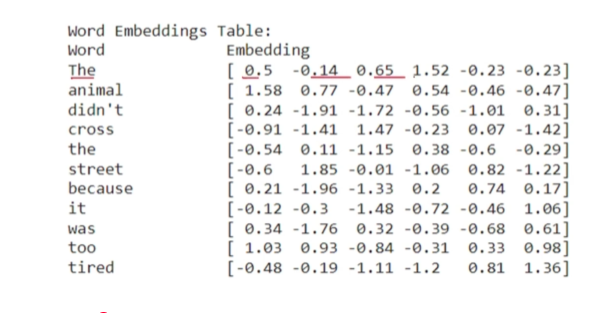

**Please get a screenshot for above from 3:45:00**

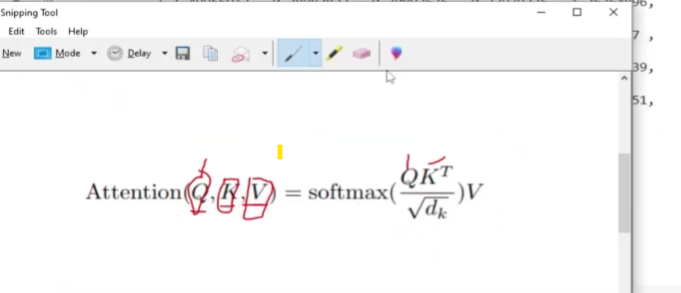

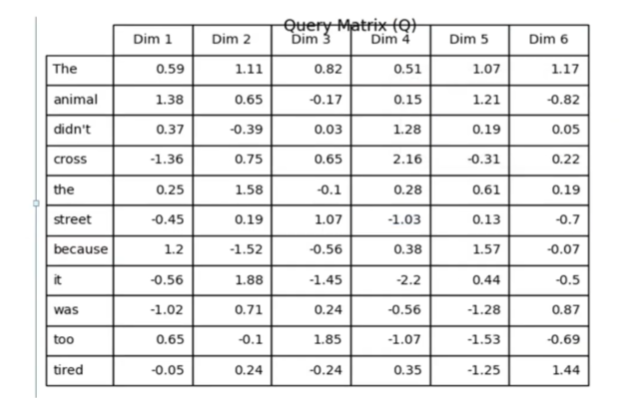

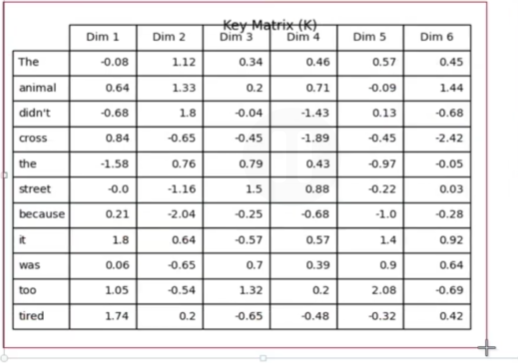

In [39]:
#q multiplied by K transpose

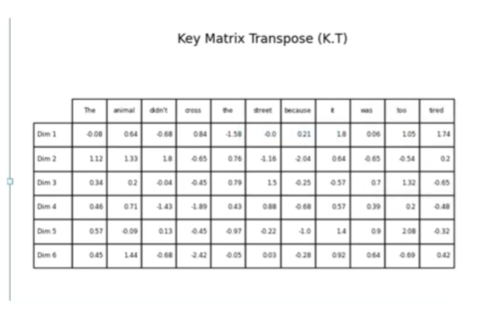

In [40]:
q.shape

(11, 6)

In [41]:
q.shape , k.shape

((11, 6), (11, 6))

In [42]:
k=k.T

In [43]:
k.shape  # the k is transposed now

(6, 11)

In [44]:
q.shape, k.shape

((11, 6), (6, 11))

In [45]:
#lets multiply k is already transpose

o=np.matmul(q,k)

In [46]:
o.shape

(11, 11)

In [47]:
# query ---> kya hai tumhare paas
# transpose key --> pistol on ear what you have ?

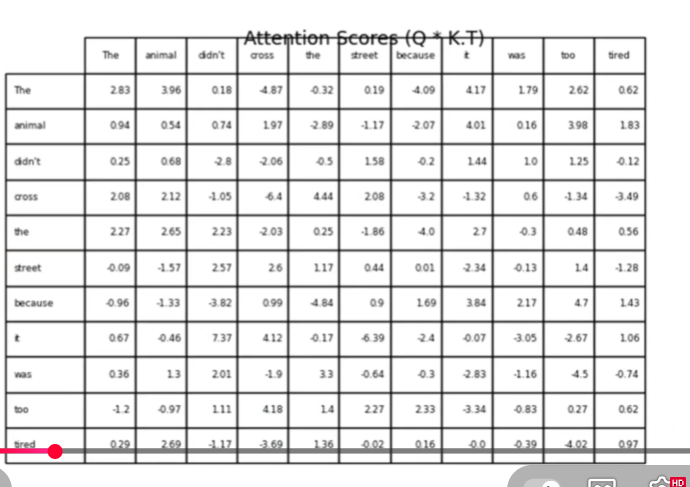

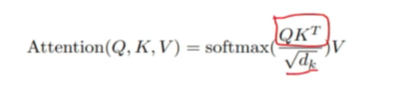

In [48]:
#why divide with root dk? -- to make the result large
q.var(),k.var(),o.var()

(np.float64(0.9268957151266478),
 np.float64(0.7541987517865455),
 np.float64(3.517125356584783))

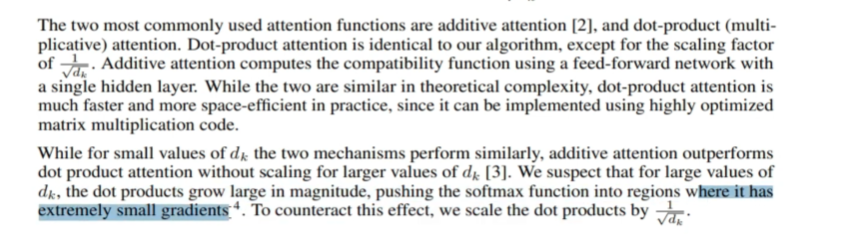

In [49]:
#a=[1,2,3] b=[4,5,3] v=2   # if you increase the dimesnion the variance gets increaased

In [50]:
#  ali=10 adil =20 , shah =40 atif=80 we need to find the multiple of ali , others have got so adil=2*ali , shah=2*adil and corresponding

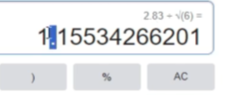

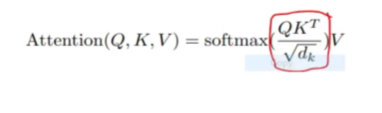

In [51]:
#we are making values smaller
#k--> is k transpose
scaled = np.matmul(q,k)
q.var(),k.var(),scaled.var()

(np.float64(0.9268957151266478),
 np.float64(0.7541987517865455),
 np.float64(3.517125356584783))

In [52]:
#divide by square with d_k
scaled = np.matmul(q,k)/math.sqrt(d_k)
q.var(),k.var(),scaled.var()

(np.float64(0.9268957151266478),
 np.float64(0.7541987517865455),
 np.float64(0.5861875594307973))

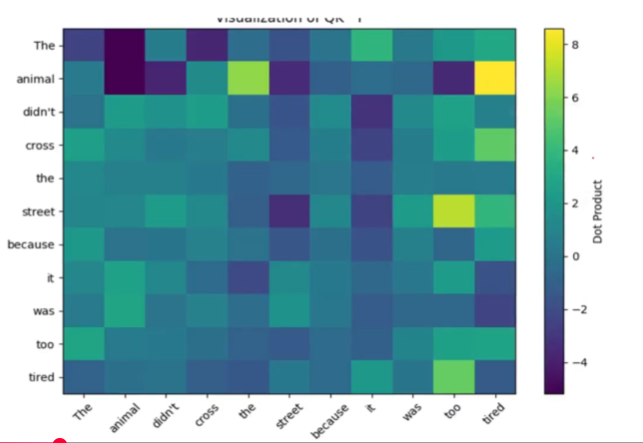

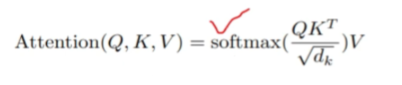

In [53]:
#lets work on softmax


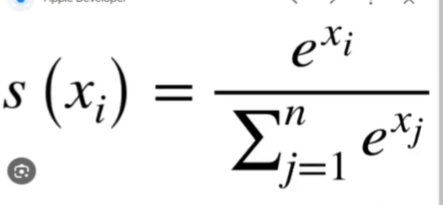

In [54]:
# [1,2,3]
#[1/1+2+3 , 2/1+2+3 , 3/1+2+3]
def softmax(x):
  return (np.exp(x).T /np.sum(np.exp(x),axis=-1)).T



In [55]:
  attention=softmax(scaled)
  attention


array([[0.04805659, 0.06702899, 0.05647257, 0.04134075, 0.07018028,
        0.07875306, 0.02403135, 0.25962206, 0.04148923, 0.28246066,
        0.03056446],
       [0.1160228 , 0.11448427, 0.05984679, 0.07978665, 0.21915833,
        0.03150236, 0.07528717, 0.0857719 , 0.11235275, 0.05788   ,
        0.04790699],
       [0.10103803, 0.05140174, 0.07240067, 0.13095098, 0.04735132,
        0.12409372, 0.07813242, 0.1073542 , 0.08083261, 0.11158639,
        0.09485792],
       [0.1269849 , 0.06898616, 0.02677122, 0.02981342, 0.02062201,
        0.01946787, 0.04062099, 0.11101297, 0.26307113, 0.27147448,
        0.02117486],
       [0.09342911, 0.14347859, 0.07674782, 0.08862665, 0.10597478,
        0.07348594, 0.11938418, 0.06724352, 0.11988124, 0.04679552,
        0.06495265],
       [0.02584324, 0.13291414, 0.09472045, 0.19667683, 0.12469663,
        0.02636593, 0.09408171, 0.03668876, 0.07571739, 0.03371781,
        0.1585771 ],
       [0.03342222, 0.14445659, 0.06348509, 0.16953936, 0.

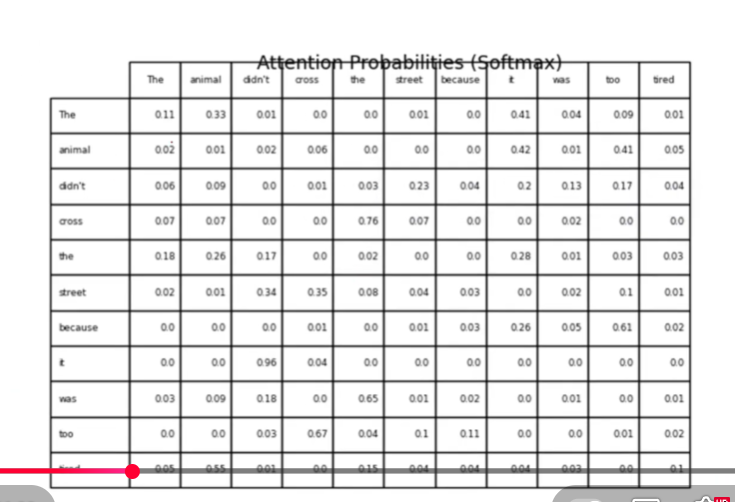

In [56]:
#if we apply softmax it makes the rsult in range 0 and 1
#range 0-1

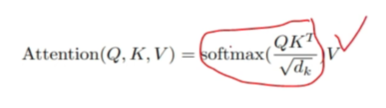

In [57]:
new_v = np.matmul(attention,v)

In [58]:
new_v

array([[ 0.38582249, -0.35223424, -0.30626292,  0.31277616, -0.42272679,
        -0.36222862],
       [ 0.52910477,  0.22321862, -0.58026097,  0.36681393, -0.03348314,
         0.06986992],
       [ 0.23483963,  0.01977348, -0.32809501,  0.48655404, -0.52964165,
        -0.30893083],
       [-0.17121825, -0.4331696 , -0.67290948,  0.08305333, -0.4961467 ,
         0.22578259],
       [ 0.19466522,  0.23078171, -0.65762085,  0.6239856 , -0.22744736,
        -0.09936086],
       [ 0.27370873,  0.54730305, -0.44718695,  0.65176012, -0.54565248,
        -0.26945453],
       [ 0.29232102,  0.14089939, -0.42185025,  0.51690539, -0.5513771 ,
        -0.38601124],
       [ 0.17654309,  0.1403194 , -0.59624149,  0.43456663, -0.24172881,
         0.14258229],
       [ 0.02643232,  0.27114025, -0.65330347,  0.47363002, -0.49248688,
        -0.09299705],
       [ 0.44359136,  0.45399065, -0.42489927,  0.75009536, -0.22543559,
        -0.38288231],
       [ 0.3061321 , -0.26877869, -0.30666942,  0.

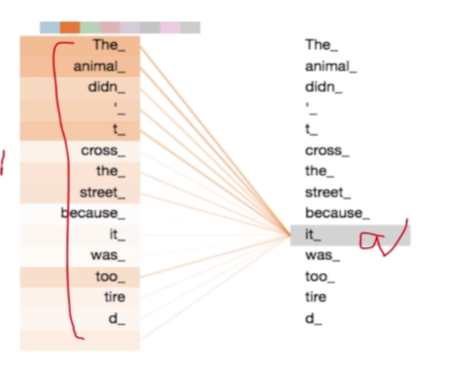

In [59]:
#self attention with masking

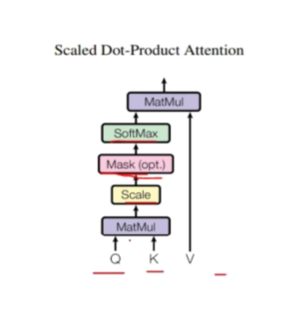

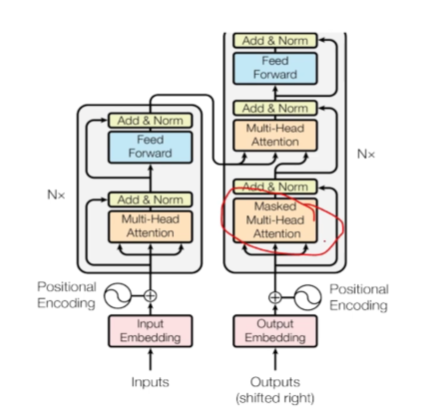

In [60]:
#formula

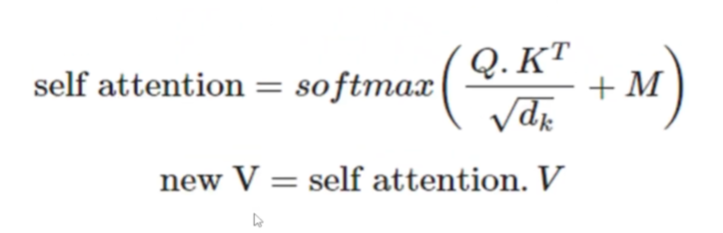

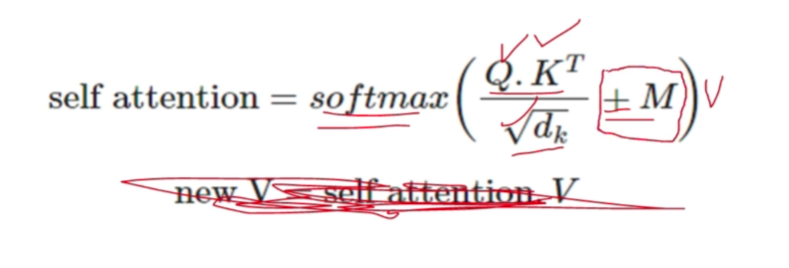

In [61]:
mask = np.tril(np.ones((L,L)))
mask

#why used ex - the animal didnt cross street
#so masked is used to predict next values ,
#thus every row has 1 after each prediction

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [62]:
mask[mask==0]=-np.inf
mask[mask==1]=0

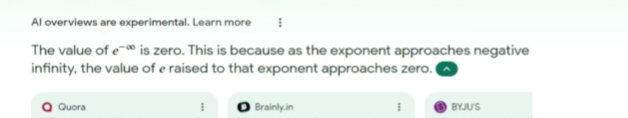

In [63]:
mask

#here probablity gets divided "-inf" doent know

array([[  0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0., -inf, -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0., -inf, -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0., -inf, -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -inf, -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -inf, -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [64]:
scaled = np.matmul(q,k)/math.sqrt(d_k)

In [65]:
scaled + mask

# the mode will see 1st word , then dont see other , after second preditction , 2 words there , rest not seen

array([[-0.41848621,        -inf,        -inf,        -inf,        -inf,
               -inf,        -inf,        -inf,        -inf,        -inf,
               -inf],
       [ 0.49213981,  0.47879056,        -inf,        -inf,        -inf,
               -inf,        -inf,        -inf,        -inf,        -inf,
               -inf],
       [ 0.22234068, -0.45348417, -0.11094072,        -inf,        -inf,
               -inf,        -inf,        -inf,        -inf,        -inf,
               -inf],
       [ 0.99498132,  0.38481901, -0.56175936, -0.45412835,        -inf,
               -inf,        -inf,        -inf,        -inf,        -inf,
               -inf],
       [ 0.0202413 ,  0.44922409, -0.17643666, -0.03252907,  0.14623943,
               -inf,        -inf,        -inf,        -inf,        -inf,
               -inf],
       [-0.72229914,  0.91535515,  0.57658174,  1.30721371,  0.85153567,
        -0.70227549,        -inf,        -inf,        -inf,        -inf,
              

In [66]:
attention = softmax(scaled+mask)
attention
#softmax of e ^ -inf is zero

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.50333726, 0.49666274, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.44937657, 0.22861432, 0.32200911, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.50279959, 0.27315225, 0.10600126, 0.1180469 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.1838226 , 0.28229537, 0.15100201, 0.17437371, 0.2085063 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.04298486, 0.22107507, 0.1575478 , 0.32713106, 0.20740696,
        0.04385425, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.05687601, 0.24582789, 0.10803526, 0.2885123 , 0.

In [67]:
new_v=np.matmul(attention,v)

In [68]:
new_v

array([[ 0.75384483, -0.75775467, -0.54638699, -0.74200419,  0.22014318,
         1.6258489 ],
       [ 0.06711178, -0.01872022, -0.94079331,  0.28655887, -0.4369972 ,
         0.9861918 ],
       [ 0.46131577,  0.37494792, -1.13276509,  0.07846886, -0.08415528,
         0.48721377],
       [ 0.36720354,  0.09707282, -0.81321185,  0.03870012, -0.32897517,
         0.65862667],
       [ 0.60411656,  0.63111905, -0.79216402,  0.27743014, -0.21531759,
         0.15538225],
       [ 0.62689502,  0.8030904 , -0.59134172,  0.3632898 , -0.44861302,
        -0.34524013],
       [ 0.22104471,  0.59972817, -0.6888591 ,  0.71861761, -0.44219797,
        -0.40356444],
       [ 0.50727738,  0.24386542, -0.83452202,  0.54888984,  0.36312458,
         0.05237602],
       [ 0.08829056,  0.30199182, -0.79136074,  0.46107564, -0.31068723,
        -0.11598581],
       [ 0.48700913,  0.41900489, -0.61051868,  0.71642167,  0.02974609,
        -0.41560009],
       [ 0.3061321 , -0.26877869, -0.30666942,  0.

In [69]:
#in deccoder input goes 1 by 1
# in encoder input goes all in 1

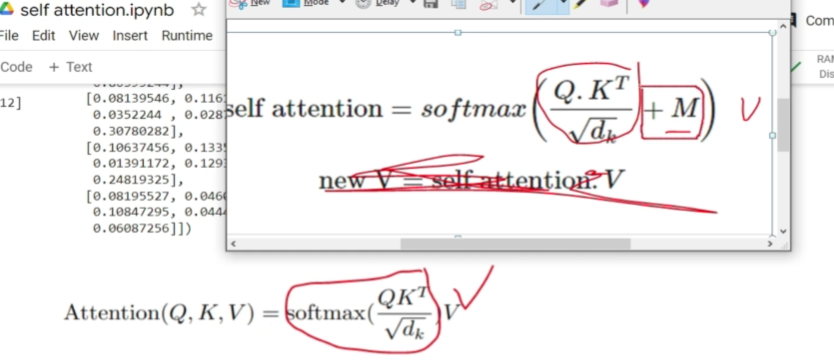

**MULTI HEAD attention**

In [70]:
# # 4:54:00
# now we know "it" is signified where
#presvious 1 theif came
# now 8 theives comes

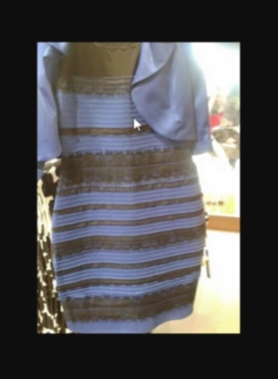

In [71]:
# check the perspective of the above clothes with every individual the colors will all be different for every individual

In [72]:
import numpy as np
import torch
import torch.nn as asnn
import torch.nn.functional as F
import math

In [73]:
# 50 sentence --- 10 * 5 batch

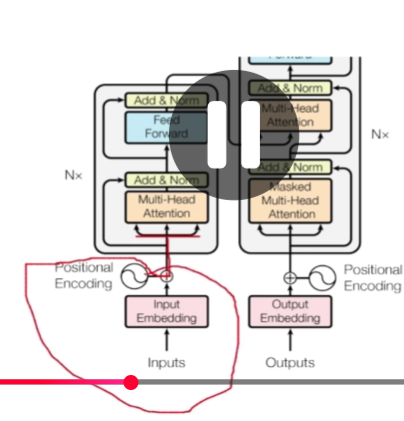

In [74]:
# above pic is of input_dim
sequence_length=11
batch_size=1
input_dim=512 # + sign
d_model=512

#[1,11,512]

x = torch.randn((batch_size,sequence_length,input_dim))
x


tensor([[[-2.2680,  0.4518,  1.2356,  ..., -0.3287, -0.5454,  0.9353],
         [ 1.1630, -0.8642, -1.0437,  ..., -0.6819, -0.0854, -0.2643],
         [-0.9437,  1.2072, -1.2204,  ..., -0.1502,  1.1524,  0.2781],
         ...,
         [-0.9727,  0.6478,  1.1924,  ..., -0.9268, -1.1466, -0.4327],
         [ 2.1431,  1.2496,  1.3085,  ...,  1.2515, -0.6331, -1.5647],
         [-0.7540, -0.7992, -0.4981,  ..., -0.0524, -0.5629,  0.6250]]])

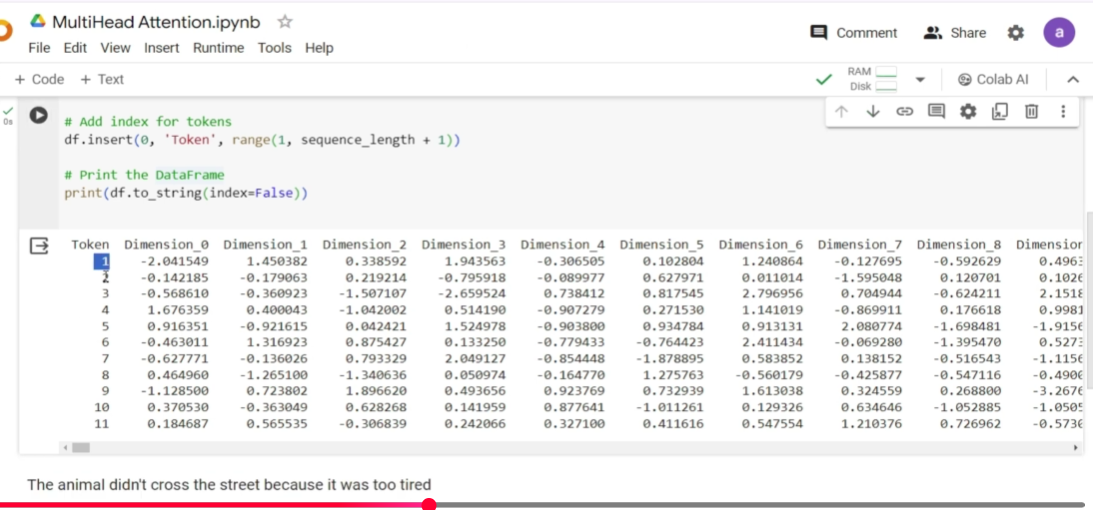

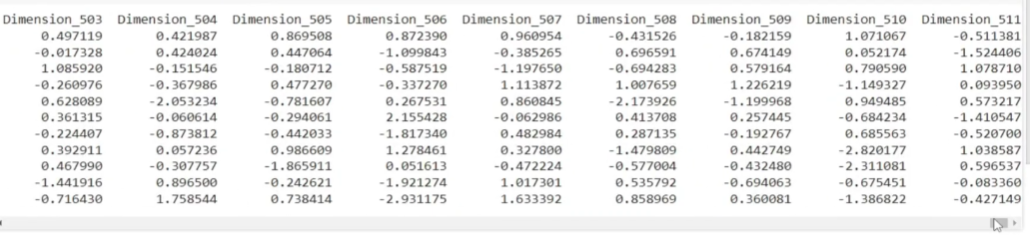

In [75]:
x.shape

torch.Size([1, 11, 512])

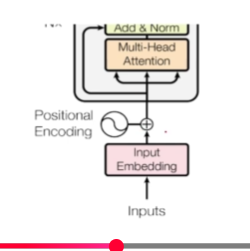

In [76]:
#lets make 3 copies to multi head attention
#lets make Q , K ,V

qkv_layer = nn.Linear(input_dim,3*d_model)

# input_dim - lets make 512 neurons --o/p since we need 3 copies , so multiplied with 3 copies


In [77]:
qkv_layer

Linear(in_features=512, out_features=1536, bias=True)

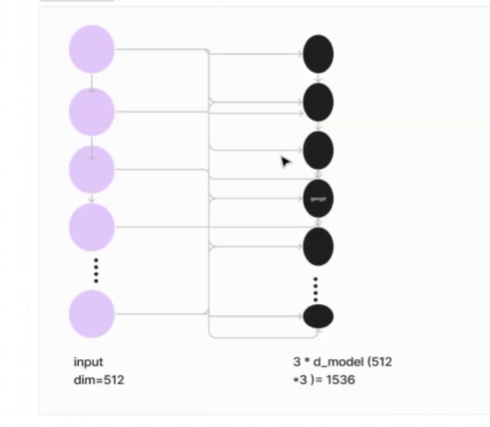

In [78]:
# 512 neuron in beginning 1536 neuron next

In [79]:
qkv=qkv_layer(x)

In [80]:
qkv.shape

torch.Size([1, 11, 1536])

In [81]:
d_model

512

In [82]:
num_heads=8
head_dim = d_model //num_heads

In [83]:
head_dim #64

64

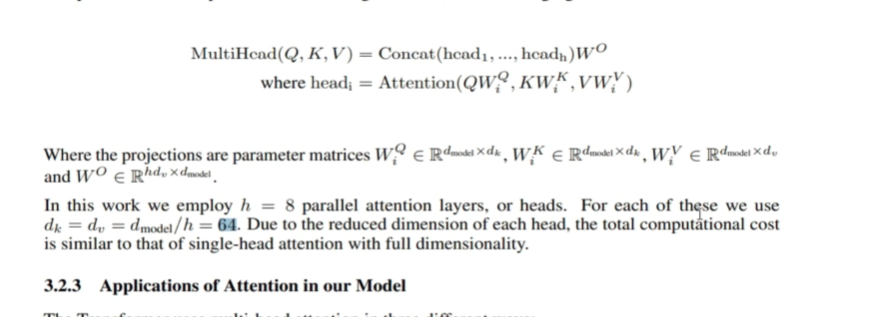

In [84]:
x = torch.randn(10,2)

x

tensor([[-0.9231, -0.4705],
        [-0.5640,  2.1193],
        [-0.7731, -1.4719],
        [ 1.7717,  0.1238],
        [ 0.3423, -0.4872],
        [ 1.9922,  0.5989],
        [-0.2777, -1.2362],
        [ 1.1137, -1.5107],
        [-0.4021,  1.7506],
        [-1.1650,  1.9309]])

In [85]:
x.shape


torch.Size([10, 2])

In [86]:
x.reshape(5,4)  #--> we can interchange into (2,5,2)=20

tensor([[-0.9231, -0.4705, -0.5640,  2.1193],
        [-0.7731, -1.4719,  1.7717,  0.1238],
        [ 0.3423, -0.4872,  1.9922,  0.5989],
        [-0.2777, -1.2362,  1.1137, -1.5107],
        [-0.4021,  1.7506, -1.1650,  1.9309]])

In [87]:
qkv.shape #1,11,1536

torch.Size([1, 11, 1536])

In [88]:
#reshape
#5:29:00
qkv = qkv.reshape(1,11,8,3*64)

In [89]:
qkv.shape  # ---> 1,11, (1536 = 8 *192)

torch.Size([1, 11, 8, 192])

In [90]:
#now reshape it
qkv = qkv.reshape(batch_size,max_sequence_length,num_heads,3*head_dim)  #-> same 1,11, <need to changenum_heads>

In [91]:
qkv.shape

torch.Size([1, 11, 8, 192])

In [92]:
#change dimesnion how ? use permute
# qkv=qkv.permute(3,2,1,0)
# qkv.shape

In [93]:
qkv=qkv.permute(0,2,1,3)
qkv.shape

torch.Size([1, 8, 11, 192])

In [94]:
#values distort todnaa dim last =1 which is 192 , now 192/3
q,k,v=qkv.chunk(3,dim=-1)
q.shape,k.shape,v.shape

(torch.Size([1, 8, 11, 64]),
 torch.Size([1, 8, 11, 64]),
 torch.Size([1, 8, 11, 64]))

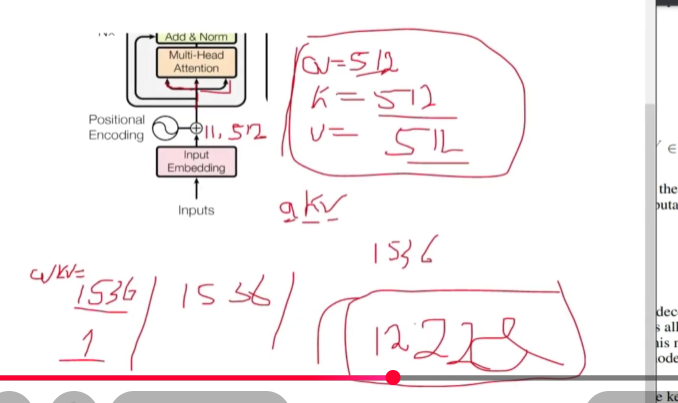

In [95]:
#512 dimesnsion  --divide with 8 heads = 64,64, 64, 64, ....8 times
# q= 512b
# , k= 512 , v=512 (then makes 8 heads from each )


**self attention with multi head**

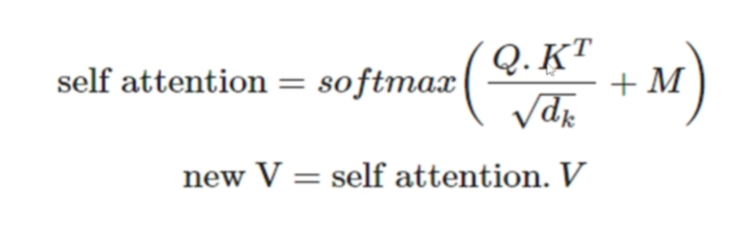

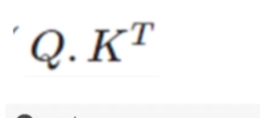

In [96]:
q.shape

torch.Size([1, 8, 11, 64])

In [97]:
k.shape

torch.Size([1, 8, 11, 64])

In [98]:
#[11,64] . [11,64]  -- need to transpose k [64,11]
#[11,64].[64,11]  --[11,11]

In [99]:
k.transpose(-2,-1).shape #[1,8,11,64] (dim 0,1,2,3 or ,-4-3,-2,-1)

torch.Size([1, 8, 64, 11])

In [100]:
torch.matmul(q,k.transpose(-2,-1)).shape

torch.Size([1, 8, 11, 11])

In [101]:
k.size()[-1]  ##how to get the last dimesnion

64

In [102]:
d_k=k.size()[-1]
d_k

64

In [103]:
scaled = torch.matmul(q,k.transpose(-2,-1))/math.sqrt(d_k)
scaled

tensor([[[[-1.6504e-01, -6.0387e-01,  3.6571e-01,  1.2688e-01, -4.8045e-01,
            3.4164e-01, -3.0226e-01,  7.7399e-02,  8.2902e-01,  1.7082e-02,
            2.8932e-01],
          [-3.0549e-01,  5.2766e-01, -2.6327e-01,  3.0877e-01, -5.5312e-01,
           -6.9766e-02, -3.8445e-02, -4.9163e-02, -3.5881e-02, -1.6484e-01,
           -6.9258e-02],
          [-4.1949e-01,  3.9167e-01, -5.3309e-01,  1.5734e-01, -5.4582e-01,
            1.9021e-01,  1.9099e-01,  3.1416e-01, -2.2222e-01, -3.1337e-01,
            1.7739e-01],
          [-2.6628e-01,  3.8439e-01, -8.7972e-02, -6.6082e-01, -1.1227e-01,
           -3.6480e-01,  5.0938e-01,  5.0235e-01, -1.9544e-01, -2.3917e-01,
           -5.4063e-01],
          [-1.3214e-01,  1.7130e-01, -6.1644e-01,  1.0557e-01, -1.1621e-01,
            1.3055e-02, -4.1916e-01,  4.9095e-02, -5.2660e-02,  2.6110e-01,
            1.4034e-01],
          [-2.8430e-02, -4.4675e-01,  2.4140e-01,  4.5295e-01, -4.0806e-01,
            8.8569e-02,  2.7393e-01,  2

In [104]:
scaled.shape

torch.Size([1, 8, 11, 11])

In [105]:
#matrix mul of all 8 heads
#now lets find mask

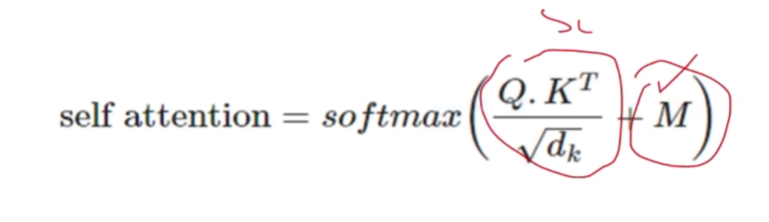

In [106]:
scaled.size()

torch.Size([1, 8, 11, 11])

In [107]:
mask = torch.full(scaled.size(),float('-inf'))
mask

tensor([[[[-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf]],

         [[-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -in

In [108]:
mask = torch.triu(mask,diagonal=1)
mask

tensor([[[[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [0., 0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
          [0., 0., 0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf],
          [0., 0., 0., 0., 0., 0., 0., -inf, -inf, -inf, -inf],
          [0., 0., 0., 0., 0., 0., 0., 0., -inf, -inf, -inf],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., -inf, -inf],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., -inf],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
          [0., 0., 0., 0., -inf, -inf, -inf, -inf,

In [109]:
mask[0][0]

tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [110]:
scaled + mask

tensor([[[[-1.6504e-01,        -inf,        -inf,        -inf,        -inf,
                  -inf,        -inf,        -inf,        -inf,        -inf,
                  -inf],
          [-3.0549e-01,  5.2766e-01,        -inf,        -inf,        -inf,
                  -inf,        -inf,        -inf,        -inf,        -inf,
                  -inf],
          [-4.1949e-01,  3.9167e-01, -5.3309e-01,        -inf,        -inf,
                  -inf,        -inf,        -inf,        -inf,        -inf,
                  -inf],
          [-2.6628e-01,  3.8439e-01, -8.7972e-02, -6.6082e-01,        -inf,
                  -inf,        -inf,        -inf,        -inf,        -inf,
                  -inf],
          [-1.3214e-01,  1.7130e-01, -6.1644e-01,  1.0557e-01, -1.1621e-01,
                  -inf,        -inf,        -inf,        -inf,        -inf,
                  -inf],
          [-2.8430e-02, -4.4675e-01,  2.4140e-01,  4.5295e-01, -4.0806e-01,
            8.8569e-02,        -inf,   

In [111]:
(scaled+mask)[0][0]

tensor([[-0.1650,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
            -inf,    -inf,    -inf],
        [-0.3055,  0.5277,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
            -inf,    -inf,    -inf],
        [-0.4195,  0.3917, -0.5331,    -inf,    -inf,    -inf,    -inf,    -inf,
            -inf,    -inf,    -inf],
        [-0.2663,  0.3844, -0.0880, -0.6608,    -inf,    -inf,    -inf,    -inf,
            -inf,    -inf,    -inf],
        [-0.1321,  0.1713, -0.6164,  0.1056, -0.1162,    -inf,    -inf,    -inf,
            -inf,    -inf,    -inf],
        [-0.0284, -0.4467,  0.2414,  0.4530, -0.4081,  0.0886,    -inf,    -inf,
            -inf,    -inf,    -inf],
        [-0.1824,  0.0760, -0.1737,  0.2001, -0.0631, -0.2684,  0.5478,    -inf,
            -inf,    -inf,    -inf],
        [-0.3571,  0.2728, -0.6621, -0.3188, -0.3345,  0.1046, -0.2045, -0.6209,
            -inf,    -inf,    -inf],
        [ 0.0721, -0.6749,  0.3021,  0.0119, -0.0903,  0

In [112]:
#same scaled+=mask

In [113]:
scaled.shape

torch.Size([1, 8, 11, 11])

In [114]:
#now apply softmax
attention=F.softmax(scaled,dim=-1)

In [115]:
attention.shape

torch.Size([1, 8, 11, 11])

In [116]:
attention[0][0]

tensor([[0.0680, 0.0439, 0.1157, 0.0911, 0.0496, 0.1129, 0.0593, 0.0867, 0.1839,
         0.0816, 0.1072],
        [0.0687, 0.1580, 0.0716, 0.1269, 0.0536, 0.0869, 0.0897, 0.0887, 0.0899,
         0.0790, 0.0870],
        [0.0598, 0.1346, 0.0534, 0.1065, 0.0527, 0.1101, 0.1102, 0.1246, 0.0729,
         0.0665, 0.1087],
        [0.0712, 0.1364, 0.0851, 0.0480, 0.0830, 0.0645, 0.1546, 0.1535, 0.0764,
         0.0731, 0.0541],
        [0.0817, 0.1107, 0.0503, 0.1036, 0.0830, 0.0945, 0.0613, 0.0979, 0.0885,
         0.1211, 0.1073],
        [0.0779, 0.0513, 0.1021, 0.1261, 0.0533, 0.0876, 0.1054, 0.0824, 0.1035,
         0.0761, 0.1344],
        [0.0742, 0.0961, 0.0749, 0.1088, 0.0836, 0.0681, 0.1540, 0.0883, 0.1083,
         0.0562, 0.0876],
        [0.0851, 0.1598, 0.0627, 0.0884, 0.0871, 0.1351, 0.0992, 0.0654, 0.0518,
         0.0935, 0.0719],
        [0.0898, 0.0425, 0.1130, 0.0845, 0.0763, 0.1064, 0.0852, 0.0753, 0.0792,
         0.1171, 0.1306],
        [0.0664, 0.0669, 0.1116, 0.06

In [117]:
values = torch.matmul(attention,v)

In [118]:
values

tensor([[[[-0.1257, -0.3453,  0.1079,  ..., -0.4651,  0.2418, -0.0157],
          [-0.1140, -0.2777,  0.1274,  ..., -0.4938,  0.3916, -0.0302],
          [-0.0811, -0.1976,  0.1558,  ..., -0.4268,  0.4459, -0.0306],
          ...,
          [-0.0218, -0.2521,  0.1458,  ..., -0.3618,  0.2372,  0.0174],
          [ 0.0492, -0.2585,  0.1673,  ..., -0.3514,  0.3062,  0.0195],
          [-0.0771, -0.2461,  0.1534,  ..., -0.4584,  0.3547,  0.0213]],

         [[-0.1257,  0.1694, -0.1489,  ...,  0.2763, -0.0298,  0.0999],
          [-0.0721,  0.0695, -0.1941,  ...,  0.2580, -0.0156,  0.0923],
          [-0.1338,  0.0851, -0.1685,  ...,  0.2809, -0.0384,  0.0399],
          ...,
          [-0.1631,  0.1205, -0.1794,  ...,  0.3171, -0.0572,  0.1069],
          [-0.1229,  0.2184, -0.1615,  ...,  0.3311, -0.0153,  0.1831],
          [-0.1609,  0.1471, -0.1799,  ...,  0.2238, -0.0256,  0.0420]],

         [[ 0.2078,  0.1272,  0.0886,  ...,  0.1742, -0.0386, -0.1325],
          [ 0.1223,  0.0104,  

In [119]:
#lets make a class for Multi-Head attention



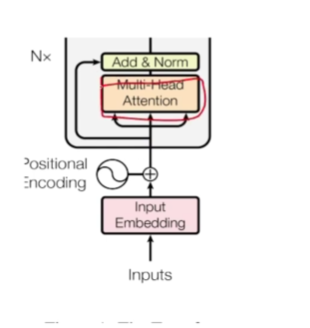

In [120]:
# Creating the Multi-Head Attention block
class MultiHeadAttentionBlock(nn.Module):

    def __init__(self, d_model: int, h: int, dropout: float) -> None: # h = number of heads

    #put dropout to reduce overfitting
    #from above example head =8
    #d_model
        super().__init__()
        self.d_model = d_model
        self.h = h

        # We ensure that the dimensions of the model is divisible by the number of heads
        assert d_model % h == 0, 'd_model is not divisible by h'
        #head_dim=d_model//num_heads 512/8 =64

        # d_k is the dimension of each attention head's key, query, and value vectors
        self.d_k = d_model // h

        # d_k formula, like in the original "Attention Is All You Need" paper

        # Defining the weight matrices
        self.w_q = nn.Linear(d_model, d_model) # W_q
        self.w_k = nn.Linear(d_model, d_model) # W_k
        self.w_v = nn.Linear(d_model, d_model) # W_v
        self.w_o = nn.Linear(d_model, d_model) # W_o

        self.dropout = nn.Dropout(dropout) # Dropout layer to avoid overfitting

# why used static method ? there is no required to create an instance of the object , only use the class
    @staticmethod
    def attention(query, key, value, mask, dropout: nn.Dropout):# mask => When we want certain words to NOT interact with others, we "hide" them

        d_k = query.shape[-1] # The last dimension of query, key, and value (1,8,11,64) -->64

        # We calculate the Attention(Q,K,V) as in the formula in the image above
        attention_scores = (query @ key.transpose(-2,-1)) / math.sqrt(d_k) # @ = Matrix multiplication sign in PyTorch 0,1,2,3 ---> -4,-3,-2,-1  [1,8,11,64] -> after transpose [1,8,64,11]

        # Before applying the softmax, we apply the mask to hide some interactions between words
        if mask is not None: # If a mask IS defined...
            attention_scores.masked_fill_(mask == 0, -1e9) # Replace each value where mask is equal to 0 by -1e9 where ever you find zero fill it with -1e9(-inf) (attention+M)
        attention_scores = attention_scores.softmax(dim = -1) # Applying softmax apply softmax(attention+M)
        if dropout is not None: # If a dropout IS defined...
            attention_scores = dropout(attention_scores) # We apply dropout to prevent overfitting

        return (attention_scores @ value), attention_scores # Multiply the output matrix by the V matrix, as in the formula = softmax(attention+M) *V , return attention scores

    def forward(self, q, k, v, mask):

        query = self.w_q(q) # Q' matrix (1,11,512)
        key = self.w_k(k) # K' matrix (1,11,512)
        value = self.w_v(v) # V' matrix (1,11,512)


        # Splitting results into smaller matrices for the different heads
        # Splitting embeddings (third dimension) into h parts
        query = query.view(query.shape[0], query.shape[1], self.h, self.d_k).transpose(1,2) # Transpose => bring the head to the second dimension 1 , 11, h=8, d_k =512 ---(1,11,8,512/8) after transpose 1,2 --> 1,8,11,512/8



        key = key.view(key.shape[0], key.shape[1], self.h, self.d_k).transpose(1,2) # Transpose => bring the head to the second dimension 1,11,8,512 /8--> 1,8,11,512/8



        value = value.view(value.shape[0], value.shape[1], self.h, self.d_k).transpose(1,2) # Transpose => bring the head to the second dimension  1,8,11,512/8 --> 1,11,8,512/8
        #after coming from attention function
        # Obtaining the output and the attention scores
        x, self.attention_scores = MultiHeadAttentionBlock.attention(query, key, value, mask, self.dropout)

        # Obtaining the H matrix
        x = x.transpose(1, 2).contiguous().view(x.shape[0], -1, self.h * self.d_k) #output 512   heads [1,8,11,512/8]--> tranpose 1,2 [1,11,8,512/8]  --->(now add) contiguous(it ensures all the tenor to become a single block on contiguos code) (1,11,8,64) --> reshapeusing view (1,-1 , 8*512/8)

        return self.w_o(x) # Multiply the H matrix by the weight matrix W_o, resulting in the MH-A matrix 512 dim and 512 output

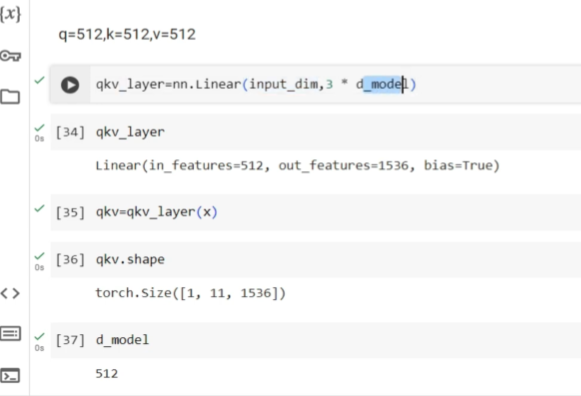

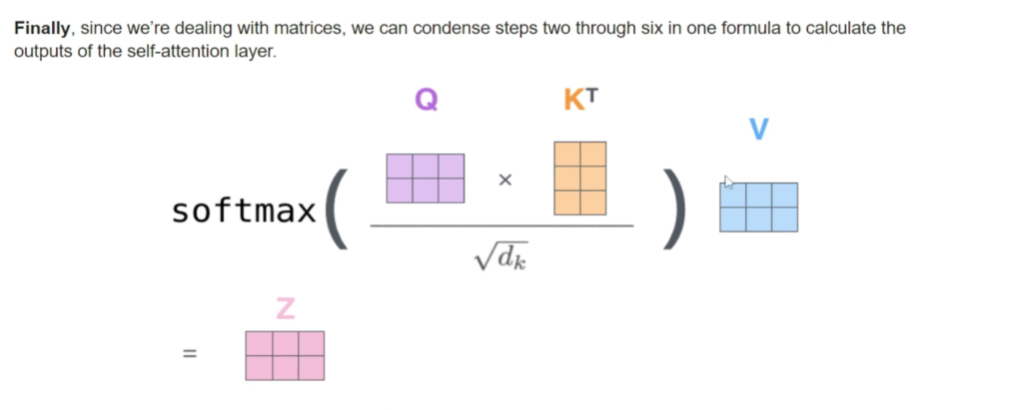

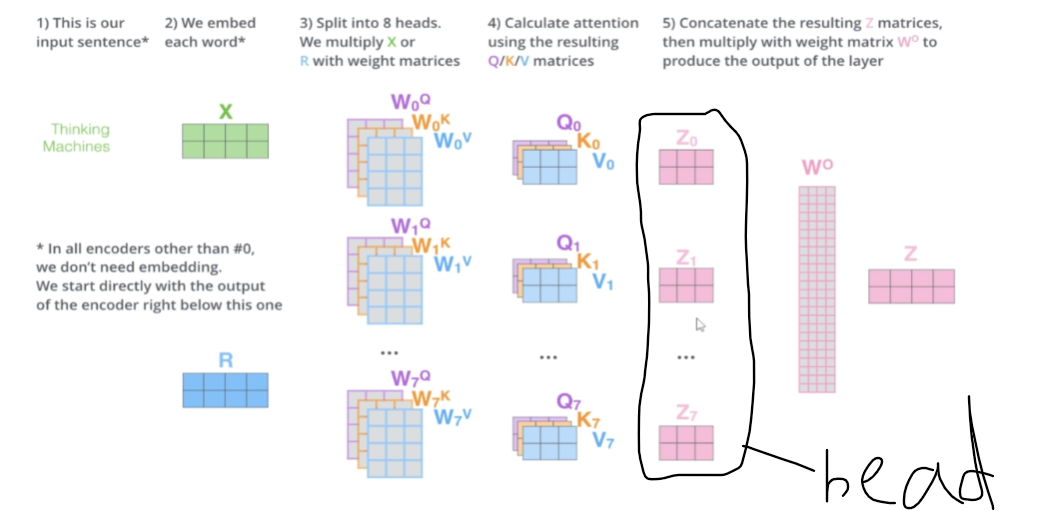

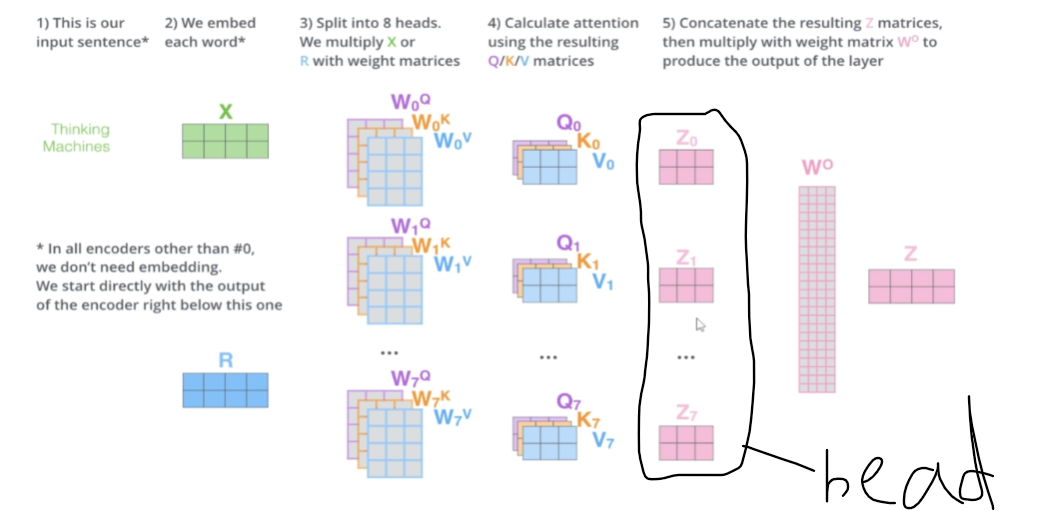

**4.layer normalisation (add and norm)**

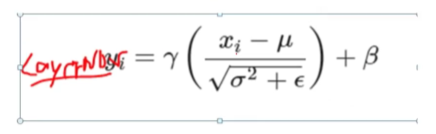

In [121]:
  # xi = input from multihead
  # u = mean
  # sigmsa=variance after squariing becomes standard deviation


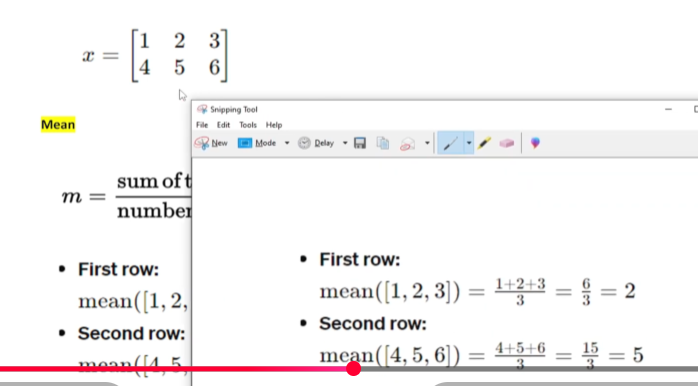

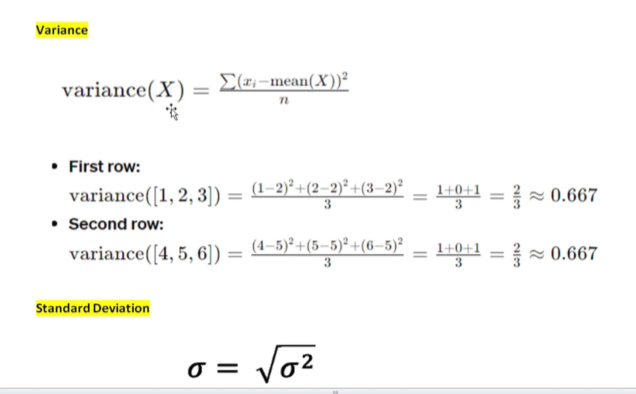

In [122]:
   #7:29:00

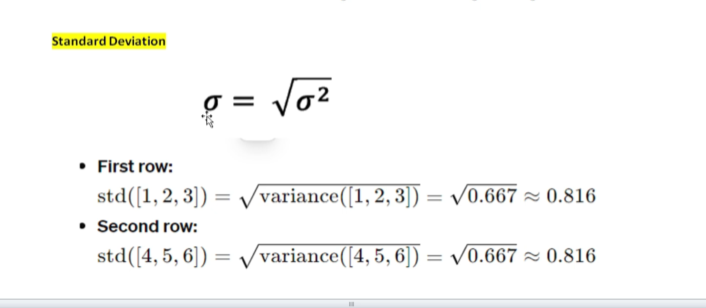

In [123]:
# xi - u(mew) = mean centered


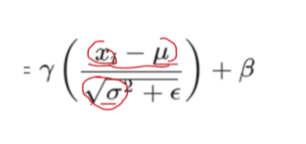

In [124]:
# Beta =
# random data will make slower ? how to fix it ?


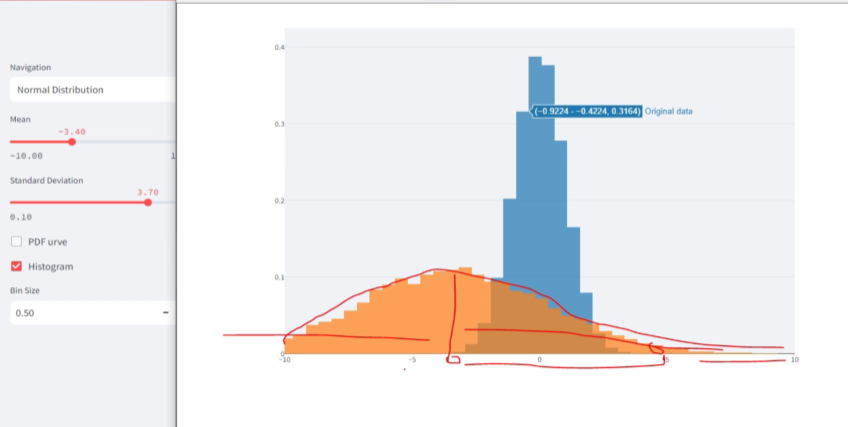

In [125]:
#see above orange data
#data faila hua hai
#need to do mean centred
#mean =0 standard deviation=1

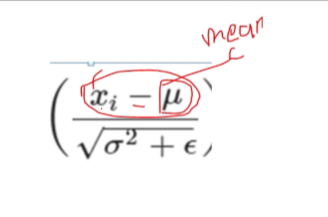

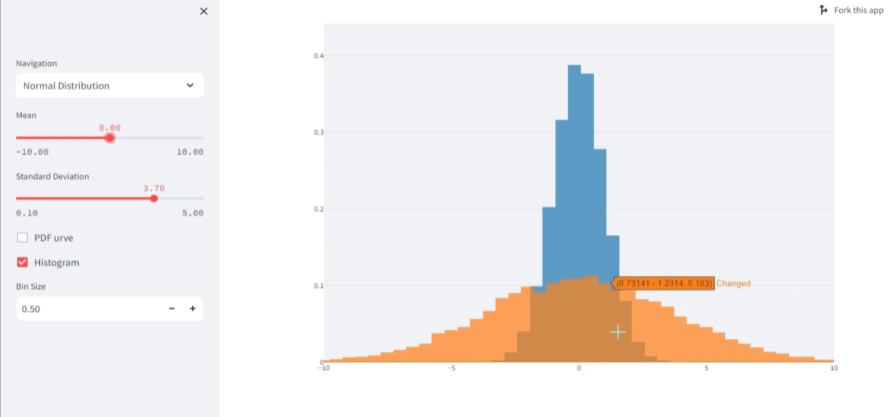

In [126]:
# now mean centred

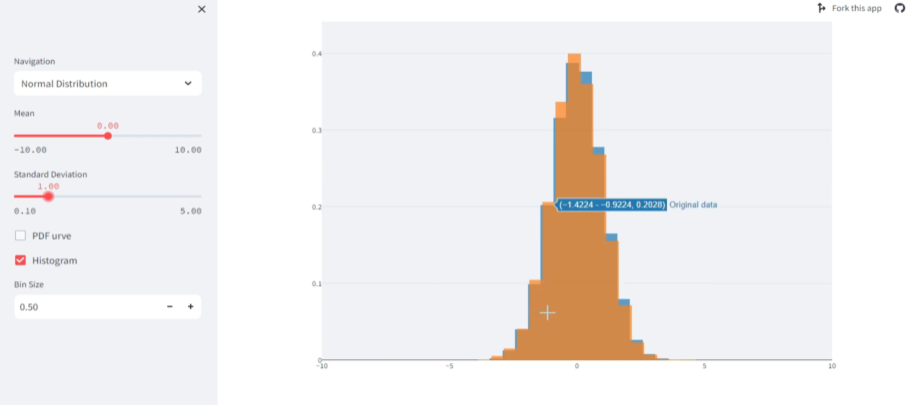

In [127]:
#standard deviation=1

In [128]:
# when mean=0 and standard deviation=1 , then data is standard normal distribution



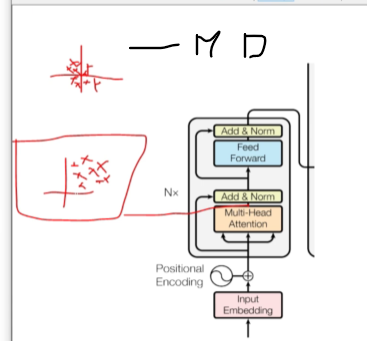

In [129]:
# epsilon = why ? if sigma is very very small , then we can add a small value which is epsilon

In [130]:
#beta = data shift
#gama = data ke failow ko badha rahe hai , data ko scale karega

# why added when its standarrd normal mean distribution ?

# we are giving model free hand to change the data , learnable data i.e shift data ,


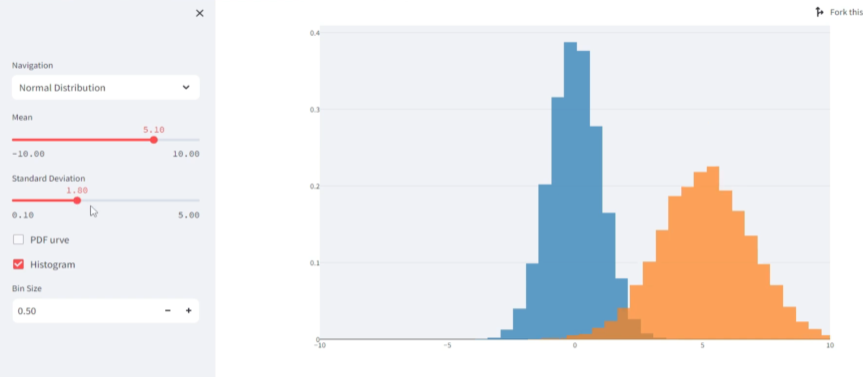

In [131]:
#after changing gama

In [132]:
# Creating Layer Normalization
class LayerNormalization(nn.Module):

    def __init__(self, eps: float = 10**-6) -> None: # We define epsilon as 0.000001 to avoid division by zero
        super().__init__()
        self.eps = eps

        # We define alpha as a trainable parameter and initialize it with ones (gama)
        self.alpha = nn.Parameter(torch.ones(1)) # One-dimensional tensor that will be used to scale the input data

        # We define bias as a trainable parameter and initialize it with zeros (Beta)
        self.bias = nn.Parameter(torch.zeros(1)) # One-dimensional tenso that will be added to the input data

    def forward(self, x):
        mean = x.mean(dim = -1, keepdim = True) # Computing the mean of the input data. Keeping the number of dimensions unchanged (last dimession , keep dim wahi rakho= True)
        std = x.std(dim = -1, keepdim = True) # Computing the standard deviation of the input data. Keeping the number of dimensions unchanged (last dimension and dim wahi rakho = True)

        # Returning the normalized input
        #(gama(x - meu) / (std+epsilon)) + beta
        return self.alpha * (x - mean) / (std + self.eps) + self.bias

In [133]:
#elaborative formula from below mentioned in above code

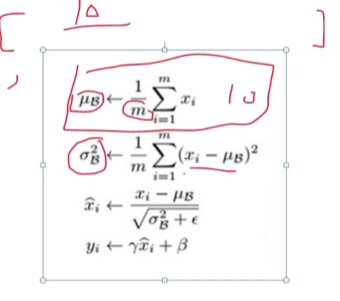

**5. Position wise Feed forward network**

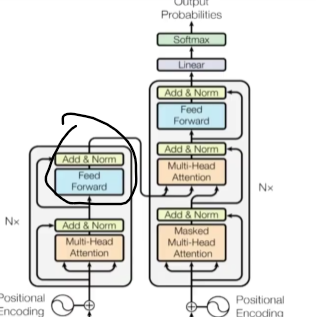

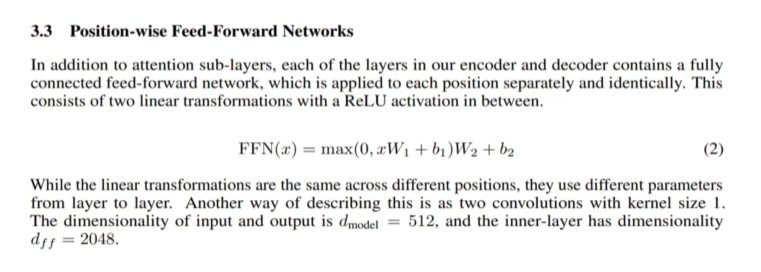

In [134]:
#check line
# This consists of two linear transformation with a ReLU activation in between
# input=512=output=d_model
#d_ff=2048
#input=512 / middle layer 2048 output=512

In [135]:
# Creating Feed Forward Layers
class FeedForwardBlock(nn.Module):

    def __init__(self, d_model: int, d_ff: int, dropout: float) -> None:
        super().__init__()
        # First linear transformation
        self.linear_1 = nn.Linear(d_model, d_ff) # W1 & b1
        self.dropout = nn.Dropout(dropout) # Dropout to prevent overfitting
        # Second linear transformation
        self.linear_2 = nn.Linear(d_ff, d_model) # W2 & b2

    def forward(self, x):
        # (Batch, seq_len, d_model=512) --> (batch, seq_len, d_ff=2048) -->(batch, seq_len, d_model=512)
        #b=self.linear_1(x)
        #s=torch.relu(b)
        #e= self.dropout(s)# it deactivates some of neuron
        #z= self.linear_2(e)
        return self.linear_2(self.dropout(torch.relu(self.linear_1(x))))

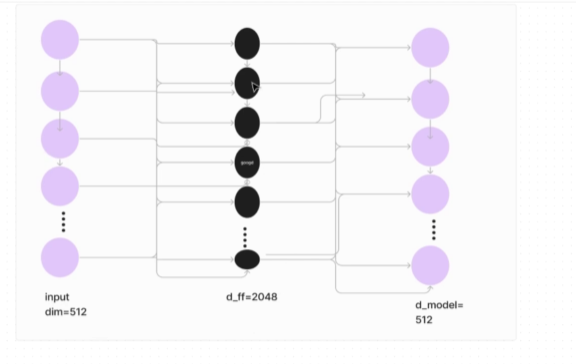

**6.Residual connection**

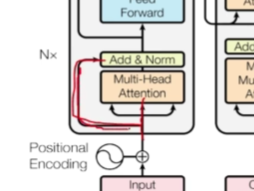

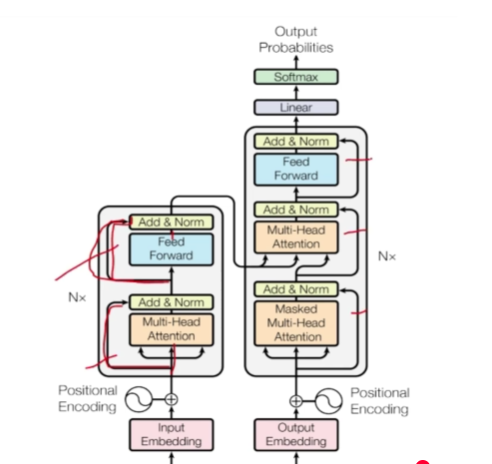

In [136]:
#6 residual connections

In [137]:
# Building Residual Connection
class ResidualConnection(nn.Module):
    def __init__(self, dropout: float) -> None:
        super().__init__()
        self.dropout = nn.Dropout(dropout) # We use a dropout layer to prevent overfitting
        self.norm = LayerNormalization() # We use a normalization layer

    def forward(self, x, sublayer):
        # We normalize the input and add it to the original input 'x'. This creates the residual connection process. requires input and  x ---> direcctly going  into Add & Norm and another is going into Multihead
        #original
        #return x + self.dropout(self.norm(sublayer(x)))<--- but this is not followed , university suggests below formula
        return x + self.dropout(sublayer(self.norm(x)))  # mutl-head attention is a sublayer and after that normalisation happens + x is another network
        #according to paper return self.norm(x+ sublayer(x))

**7.encoder**

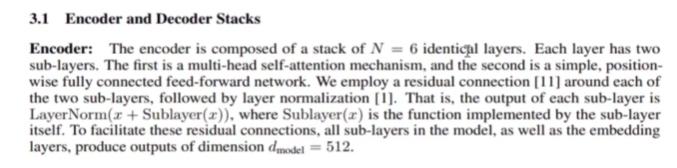

In [138]:
#stack of n=6 identiccal layers each layer has 2 sublayers

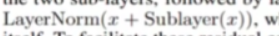

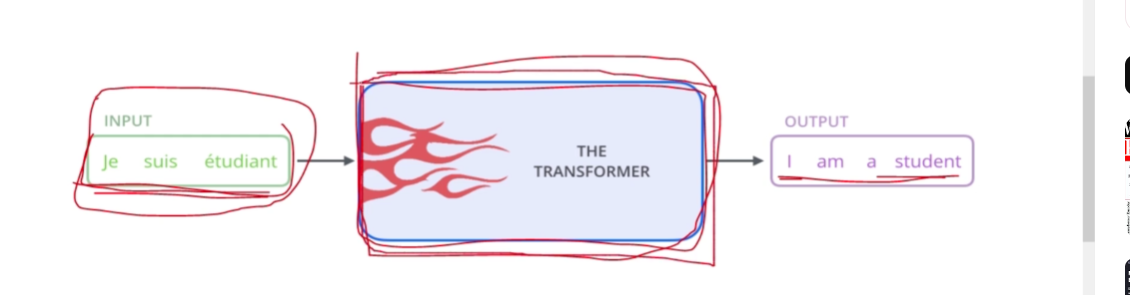

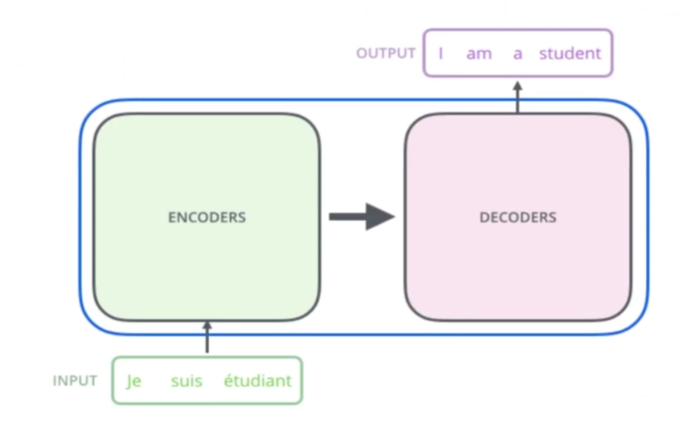

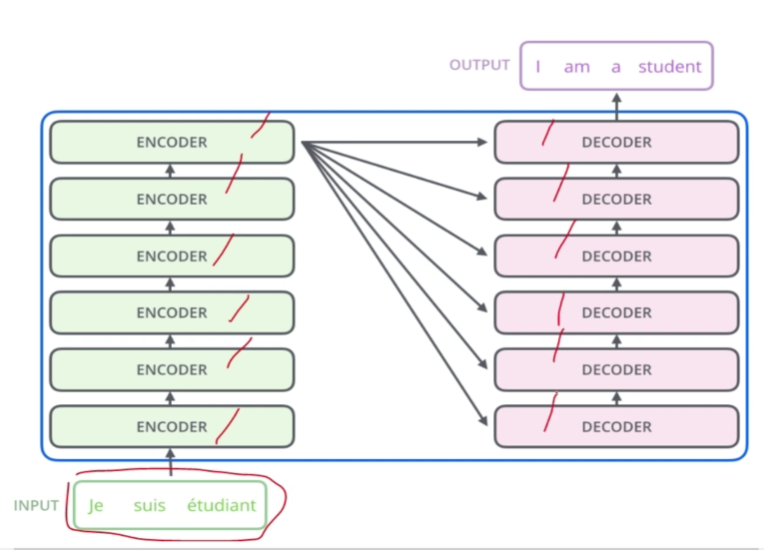

In [139]:
# N=6

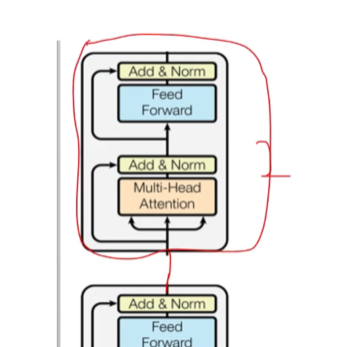

In [140]:
# the above encoder is stacked one above another uptill N=6

#the last encoder has key and values which is going to decoder
#the query is coming from Add and norms as shown below
#the decoder is also stacked N=6

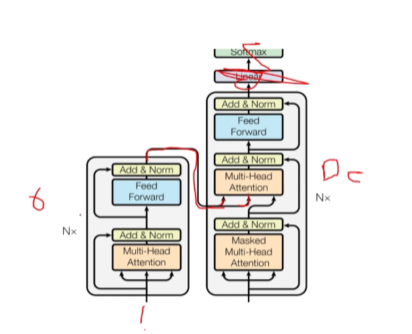

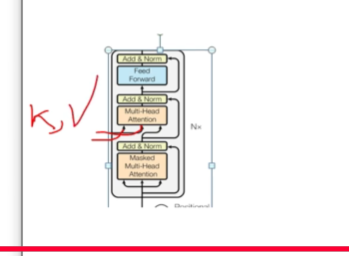

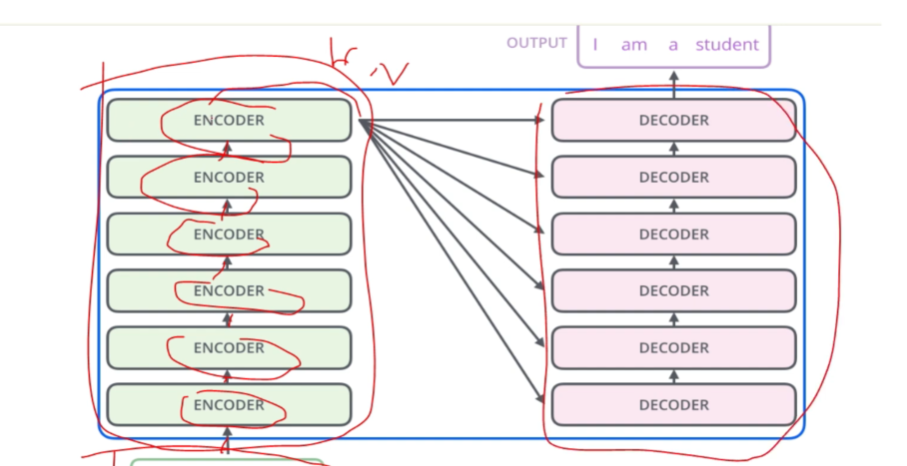

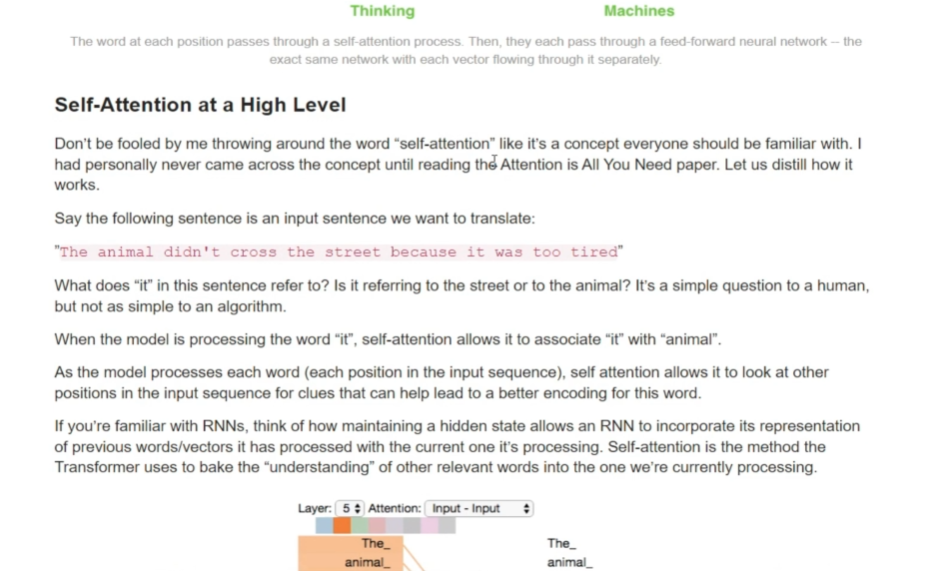

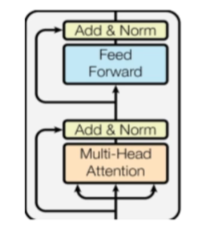

In [141]:
#lets code encoder

In [142]:
# Building Encoder Block
class EncoderBlock(nn.Module):

    # This block takes in the MultiHeadAttentionBlock and FeedForwardBlock, as well as the dropout rate for the residual connections , it takes object of previously build MultiHeadAttentionBlock and feed_forward_block
    def __init__(self, self_attention_block: MultiHeadAttentionBlock, feed_forward_block: FeedForwardBlock, dropout: float) -> None:
        super().__init__()
        # Storing the self-attention block and feed-forward block
        #below are the instance variable created
        self.self_attention_block = self_attention_block
        self.feed_forward_block = feed_forward_block

        #REsidualConnection --> is the class , its creating instance , droupout is being give , loop to create 2 connections instance
        #list comprehension is used here.
        #nn.ModuleList-- same as List , use to create 2 subclass , use to save subclass
        self.residual_connections = nn.ModuleList([ResidualConnection(dropout) for _ in range(2)]) # 2 Residual Connections with dropout

    def forward(self, x, src_mask):
        # data how its following/flowing?
        # Applying the first residual connection with the self-attention block

        #in lambda function the input coming from down x ; qkv , go in self_atttention class (q,k,v,mask)

        #self_attention_block: MultiHeadAttentionBlock
        x = self.residual_connections[0](x, lambda x: self.self_attention_block(x, x, x, src_mask)) # Three 'x's corresponding to query, key, and value inputs plus source mask

        # the same above x of the output is given below as input below \
        #feed_forward_block: FeedForwardBlock

        # Applying the second residual connection with the feed-forward block
        #
        x = self.residual_connections[1](x, self.feed_forward_block)
        return x # Output tensor after applying self-attention and feed-forward layers with residual connections.

there are 2 residual connections

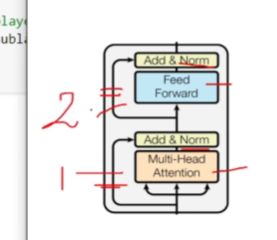

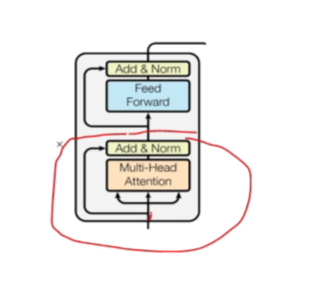

In [143]:
        # x = self.residual_connections[0](x, lambda x: self.self_attention_block(x, x, x, src_mask)) # Three 'x's corresponding to query, key, and value inputs plus source mask

In [144]:
 #the above ouptut of x is givenn as input to below x
  # x = self.residual_connections[1](x, self.feed_forward_block)
  #       return x

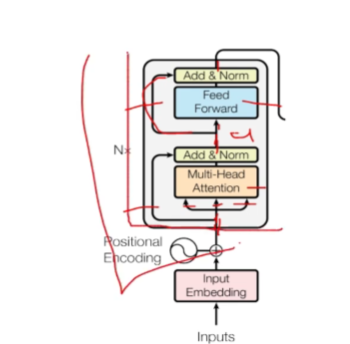

In [145]:
#above 1 block is made now we have to made 6 encoder block

In [146]:
 # Building Encoder
# An Encoder can have several Encoder Blocks
class Encoder(nn.Module):

    # The Encoder takes in instances of 'EncoderBlock'
    #think this nn.ModuleList has 6 encoders
    def __init__(self, layers: nn.ModuleList) -> None:
        super().__init__()
        self.layers = layers # Storing the EncoderBlocks
        self.norm = LayerNormalization() # Layer for the normalization of the output of the encoder layers

    def forward(self, x, mask):
        # Iterating over each EncoderBlock stored in self.layers
        for layer in self.layers:
            x = layer(x, mask) # Applying each EncoderBlock to the input tensor 'x' the loop will run 6 times
        #the above on is acalling def forward(self, x, src_mask): from above
        #here extracting each layer and normalizing
        return self.norm(x) # Normalizing output

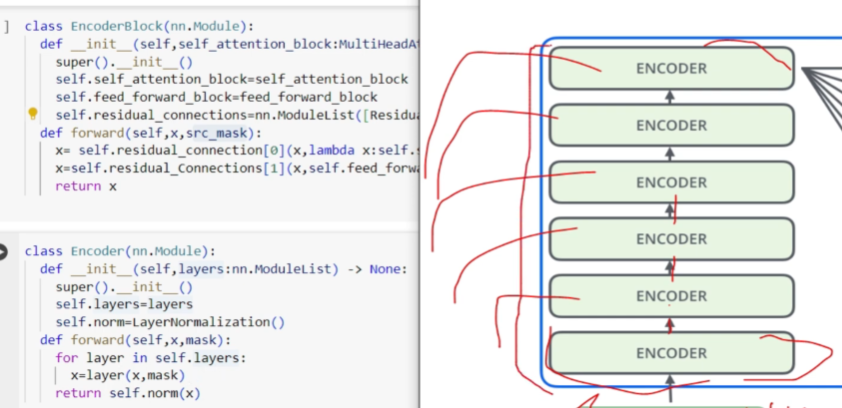

In [147]:
#now lets code decoder
# Building Decoder Block
class DecoderBlock(nn.Module):

    # The DecoderBlock takes in two MultiHeadAttentionBlock. One is self-attention, while the other is cross-attention.
    # It also takes in the feed-forward block and the dropout rate
    def __init__(self,  self_attention_block: MultiHeadAttentionBlock,
                 cross_attention_block: MultiHeadAttentionBlock,feed_forward_block: FeedForwardBlock,
                 dropout: float) -> None:
        super().__init__()
        self.self_attention_block = self_attention_block

        self.cross_attention_block = cross_attention_block

        self.feed_forward_block = feed_forward_block

        self.residual_connections = nn.ModuleList([ResidualConnection(dropout) for _ in range(3)]) # List of three Residual Connections with dropout rate
        #the residual connection is connected with each other as seen in below diagrams
        # 3 residual connection class instance was created

    def forward(self, x, encoder_output, src_mask, tgt_mask):

        # Self-Attention block with query, key, and value plus the target language mask
        x = self.residual_connections[0](x, lambda x: self.self_attention_block(x, x, x, tgt_mask))
        #taking q,k,v
        #tgt_mask is from decoder(Masked)

        # The Cross-Attention block using two 'encoder_ouput's for key and value plus the source language mask. It also takes in 'x' for Decoder queries
        x = self.residual_connections[1](x, lambda x: self.cross_attention_block(x, encoder_output, encoder_output, src_mask))

        #middle part from below diagram you can see the ouput from encoder is being taken in middle of attention block "cross attention"
        #k,v are from encoder q are from above self attention
        #src_mask is used for padding
        #src_mask is from encoder


        # Feed-forward block with residual connections
        x = self.residual_connections[2](x, self.feed_forward_block)
        return x

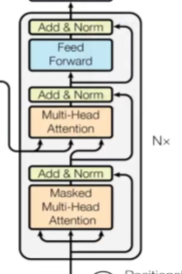

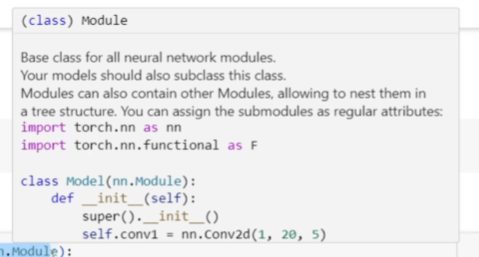

In [148]:
#this one is already build in the encoder you only need to join

In [149]:
# Building Decoder
# A Decoder can have several Decoder Blocks
class Decoder(nn.Module):

    # The Decoder takes in instances of 'DecoderBlock'
    def __init__(self, layers: nn.ModuleList) -> None:
        super().__init__()

        # Storing the 'DecoderBlock's
        self.layers = layers
        self.norm = LayerNormalization() # Layer to normalize the output

    def forward(self, x, encoder_output, src_mask, tgt_mask):

        # Iterating over each DecoderBlock stored in self.layers
        for layer in self.layers:
            # Applies each DecoderBlock to the input 'x' plus the encoder output and source and target masks
            x = layer(x, encoder_output, src_mask, tgt_mask)
        return self.norm(x) # Returns normalized output
        #the last output will be layer normalistion

In [150]:
#encoder and decoder block is ready , now lets create projection layer

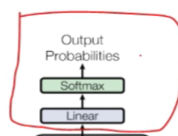

In [151]:
#Linear Layer

In [152]:
# Buiding Linear Layer
class ProjectionLayer(nn.Module):
    def __init__(self, d_model: int, vocab_size: int) -> None: # Model dimension and the size of the output vocabulary
        super().__init__()
        self.proj = nn.Linear(d_model, vocab_size) # Linear layer for projecting the feature space of 'd_model' to the output space of 'vocab_size'
    def forward(self, x):
        return torch.log_softmax(self.proj(x), dim = -1) # Applying the log Softmax function to the output
        #using last dimension

In [153]:
#how it works ?
#example --english --> hindi
#first train
#we have to feed english words , sentences and translation in hindi
# english --> input embedding
# hindi --> output embedding
#d_model=512
#vocab_size =12
#in softmax we need to convert into probablity
#

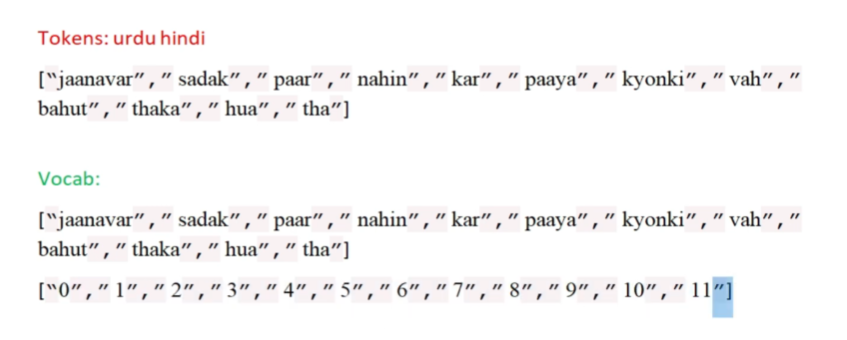

In [154]:
#lets code full transformer

**9 Building the transformer**

In [155]:
# Creating the Transformer Architecture
class Transformer(nn.Module):

    # This takes in the encoder and decoder, as well the embeddings for the source and target language.
    # It also takes in the Positional Encoding for the source and target language, as well as the projection layer
    def __init__(self, encoder: Encoder,
                 decoder: Decoder,
                 src_embed: InputEmbeddings,
                 tgt_embed: InputEmbeddings,
                 src_pos: PositionalEncoding,
                 tgt_pos: PositionalEncoding,
                 projection_layer: ProjectionLayer) -> None:
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.src_embed = src_embed
        self.tgt_embed = tgt_embed
        self.src_pos = src_pos
        self.tgt_pos = tgt_pos
        self.projection_layer = projection_layer

    # Encoder
    def encode(self, src, src_mask):
        src = self.src_embed(src) # Applying source embeddings to the input source language
        src = self.src_pos(src) # Applying source positional encoding to the source embeddings
        return self.encoder(src, src_mask) # Returning the source embeddings plus a source mask to prevent attention to certain elements

    # Decoder
    def decode(self, encoder_output, src_mask, tgt, tgt_mask):
        tgt = self.tgt_embed(tgt) # Applying target embeddings to the input target language (tgt)
        tgt = self.tgt_pos(tgt) # Applying target positional encoding to the target embeddings

        # Returning the target embeddings, the output of the encoder, and both source and target masks
        # The target mask ensures that the model won't 'see' future elements of the sequence
        return self.decoder(tgt, encoder_output, src_mask, tgt_mask)

    # Applying Projection Layer with the Softmax function to the Decoder output
    def project(self, x):
        return self.projection_layer(x)

In [156]:
# building the transformer , feeding the inputs

In [157]:
# Building & Initializing Transformer

# Definin function and its parameter, including model dimension, number of encoder and decoder stacks, heads, etc.
def build_transformer(src_vocab_size: int,
                      tgt_vocab_size: int,
                      src_seq_len: int,
                      tgt_seq_len: int,
                      d_model: int = 512,
                      N: int = 6,
                      h: int = 8,
                      dropout: float = 0.1,
                      d_ff: int = 2048) -> Transformer:

    # Creating Embedding layers
    src_embed = InputEmbeddings(d_model, src_vocab_size) # Source language (Source Vocabulary to 512-dimensional vectors)
    tgt_embed = InputEmbeddings(d_model, tgt_vocab_size) # Target language (Target Vocabulary to 512-dimensional vectors)

    # Creating Positional Encoding layers
    src_pos = PositionalEncoding(d_model, src_seq_len, dropout) # Positional encoding for the source language embeddings
    tgt_pos = PositionalEncoding(d_model, tgt_seq_len, dropout) # Positional encoding for the target language embeddings

    # Creating EncoderBlocks
    encoder_blocks = [] # Initial list of empty EncoderBlocks
    for _ in range(N): # Iterating 'N' times to create 'N' EncoderBlocks (N = 6)
        encoder_self_attention_block = MultiHeadAttentionBlock(d_model, h, dropout) # Self-Attention
        feed_forward_block = FeedForwardBlock(d_model, d_ff, dropout) # FeedForward

        # Combine layers into an EncoderBlock
        encoder_block = EncoderBlock(encoder_self_attention_block, feed_forward_block, dropout)
        encoder_blocks.append(encoder_block) # Appending EncoderBlock to the list of EncoderBlocks

    # Creating DecoderBlocks
    decoder_blocks = [] # Initial list of empty DecoderBlocks
    for _ in range(N): # Iterating 'N' times to create 'N' DecoderBlocks (N = 6)
        decoder_self_attention_block = MultiHeadAttentionBlock(d_model, h, dropout) # Self-Attention
        decoder_cross_attention_block = MultiHeadAttentionBlock(d_model, h, dropout) # Cross-Attention
        feed_forward_block = FeedForwardBlock(d_model, d_ff, dropout) # FeedForward

        # Combining layers into a DecoderBlock
        decoder_block = DecoderBlock(decoder_self_attention_block, decoder_cross_attention_block, feed_forward_block, dropout)
        decoder_blocks.append(decoder_block) # Appending DecoderBlock to the list of DecoderBlocks

    # Creating the Encoder and Decoder by using the EncoderBlocks and DecoderBlocks lists
    encoder = Encoder(nn.ModuleList(encoder_blocks))
    decoder = Decoder(nn.ModuleList(decoder_blocks))

    # Creating projection layer
    projection_layer = ProjectionLayer(d_model, tgt_vocab_size) # Map the output of Decoder to the Target Vocabulary Space

    # Creating the transformer by combining everything above
    transformer = Transformer(encoder, decoder, src_embed, tgt_embed, src_pos, tgt_pos, projection_layer)

    # Initialize the parameters
    for p in transformer.parameters():
        if p.dim() > 1:  # if the paramter dimension is greater than 1
            nn.init.xavier_uniform_(p) #weights initialised

    return transformer # Assembled and initialized Transformer. Ready to be trained and validated!

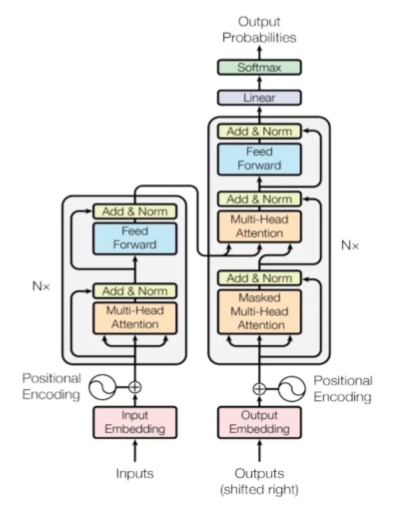

In [158]:
#these are left

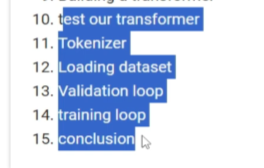

In [159]:
# Defining Tokenizer
def build_tokenizer(config, ds, lang):
  #config --> batches store
  #ds --> dataset
  #lan--> language
  #trainer used --> wordLevel

    # Crating a file path for the tokenizer
    tokenizer_path = Path(config['tokenizer_file'].format(lang))
    #tokenizer_file and language format stored in the tokenizer_path

    # Checking if Tokenizer already exists
    if not Path.exists(tokenizer_path):

        # If it doesn't exist, we create a new one
        tokenizer = Tokenizer(WordLevel(unk_token = '[UNK]')) # Initializing a new world-level tokenizer
        tokenizer.pre_tokenizer = Whitespace() # We will split the text into tokens based on whitespace

        # Creating a trainer for the new tokenizer
        trainer = WordLevelTrainer(special_tokens = ["[UNK]", "[PAD]",
                                                     "[SOS]", "[EOS]"], min_frequency = 2) # Defining Word Level strategy and special tokens

        # Training new tokenizer on sentences from the dataset and language specified
        tokenizer.train_from_iterator(get_all_sentences(ds, lang), trainer = trainer)
        tokenizer.save(str(tokenizer_path)) # Saving trained tokenizer to the file path specified at the beginning of the function
    else:
        tokenizer = Tokenizer.from_file(str(tokenizer_path)) # If the tokenizer already exist, we load it
    return tokenizer # Returns the loaded tokenizer or the trained tokenizer


In [160]:
#loading dataset

# Iterating through dataset to extract the original sentence and its translation
def get_all_sentences(ds, lang):
    for pair in ds:
        yield pair['translation'][lang]


In [161]:
#this makes the dataset ready for training and validation
def get_ds(config):

    # Loading the train portion of the OpusBooks dataset.
    # The Language pairs will be defined in the 'config' dictionary we will build later
    ds_raw = load_dataset('opus_books', f'{config["lang_src"]}-{config["lang_tgt"]}', split = 'train')

    # Building or loading tokenizer for both the source and target languages
    tokenizer_src = build_tokenizer(config, ds_raw, config['lang_src']) #this will go in encoder
    tokenizer_tgt = build_tokenizer(config, ds_raw, config['lang_tgt']) # this will go in target

    # Splitting the dataset for training and validation
    train_ds_size = int(0.9 * len(ds_raw)) # 90% for training

    val_ds_size = len(ds_raw) - train_ds_size # 10% for validation

    train_ds_raw, val_ds_raw = random_split(ds_raw, [train_ds_size, val_ds_size]) # Randomly splitting the dataset

    # Processing data with the BilingualDataset class, which we will define below
    train_ds = BilingualDataset(train_ds_raw, tokenizer_src, tokenizer_tgt,config['lang_src'], config['lang_tgt'], config['seq_len'])

    val_ds = BilingualDataset(val_ds_raw, tokenizer_src, tokenizer_tgt, config['lang_src'], config['lang_tgt'], config['seq_len'])

    # Iterating over the entire dataset and printing the maximum length found in the sentences of both the source and target languages
    max_len_src = 0
    max_len_tgt = 0
    #sending the data in batches
    for pair in ds_raw:
        src_ids = tokenizer_src.encode(pair['translation'][config['lang_src']]).ids
        tgt_ids = tokenizer_src.encode(pair['translation'][config['lang_tgt']]).ids
        max_len_src = max(max_len_src, len(src_ids))
        max_len_tgt = max(max_len_tgt, len(tgt_ids))

    print(f'Max length of source sentence: {max_len_src}')
    print(f'Max length of target sentence: {max_len_tgt}')

    # Creating dataloaders for the training and validadion sets
    # Dataloaders are used to iterate over the dataset in batches during training and validation
    train_dataloader = DataLoader(train_ds, batch_size = config['batch_size'], shuffle = True) # Batch size will be defined in the config dictionary
    val_dataloader = DataLoader(val_ds, batch_size = 1, shuffle = True)

    return train_dataloader, val_dataloader, tokenizer_src, tokenizer_tgt # Returning the DataLoader objects and tokenizers


In [162]:
# 11:51:00
#https://huggingface.co/datasets/Helsinki-NLP/opus_books/viewer/en-it?row=19&views%5B%5D=en_it

In [163]:
def casual_mask(size):
        # Creating a square matrix of dimensions 'size x size' filled with ones
        mask = torch.triu(torch.ones(1, size, size), diagonal = 1).type(torch.int)
        return mask == 0
#the above function will be used in decoder
#in decoder when he is about to see previous , it will prevent from cheating

In [164]:
class BilingualDataset(Dataset):

    # This takes in the dataset contaning sentence pairs, the tokenizers for target and source languages, and the strings of source and target languages
    # 'seq_len' defines the sequence length for both languages
    def __init__(self,
                 ds,
                 tokenizer_src,
                 tokenizer_tgt,
                 src_lang,
                 tgt_lang,
                 seq_len) -> None:
        super().__init__()

        self.seq_len = seq_len
        self.ds = ds
        self.tokenizer_src = tokenizer_src
        self.tokenizer_tgt = tokenizer_tgt
        self.src_lang = src_lang
        self.tgt_lang = tgt_lang

        # Defining special tokens by using the target language tokenizer
        #instance variable is created SOS , EOS and PAD is converted into id
        self.sos_token = torch.tensor([tokenizer_tgt.token_to_id("[SOS]")], dtype=torch.int64)
        self.eos_token = torch.tensor([tokenizer_tgt.token_to_id("[EOS]")], dtype=torch.int64)
        self.pad_token = torch.tensor([tokenizer_tgt.token_to_id("[PAD]")], dtype=torch.int64)


    # Total number of instances in the dataset (some pairs are larger than others)
    def __len__(self):
        return len(self.ds)

    # Using the index to retrive source and target texts
    def __getitem__(self, index: Any) -> Any:
        src_target_pair = self.ds[index]
        #the source and target text is extracted and put into encoder tokens wiht the ids
        src_text = src_target_pair['translation'][self.src_lang]
        tgt_text = src_target_pair['translation'][self.tgt_lang]

        # Tokenizing source and target texts
        #text are convereted into ids
        enc_input_tokens = self.tokenizer_src.encode(src_text).ids
        dec_input_tokens = self.tokenizer_tgt.encode(tgt_text).ids

        # Computing how many padding tokens need to be added to the tokenized texts
        # Source tokens
        enc_num_padding_tokens = self.seq_len - len(enc_input_tokens) - 2 # Subtracting the two '[EOS]' and '[SOS]' special tokens
        # Target tokens
        dec_num_padding_tokens = self.seq_len - len(dec_input_tokens) - 1 # Subtracting the '[SOS]' special token

        # If the texts exceed the 'seq_len' allowed, it will raise an error. This means that one of the sentences in the pair is too long to be processed
        # given the current sequence length limit (this will be defined in the config dictionary below)
        if enc_num_padding_tokens < 0 or dec_num_padding_tokens < 0:
            raise ValueError('Sentence is too long')

        # Building the encoder input tensor by combining several elements
        encoder_input = torch.cat(
            [
            self.sos_token, # inserting the '[SOS]' token

            torch.tensor(enc_input_tokens, dtype = torch.int64), # Inserting the tokenized source text

            self.eos_token, # Inserting the '[EOS]' token

            torch.tensor([self.pad_token] * enc_num_padding_tokens, dtype = torch.int64) # Addind padding tokens(if the sentence is very small)
            ]
        )

        # Building the decoder input tensor by combining several elements
        decoder_input = torch.cat(
            [
                self.sos_token, # inserting the '[SOS]' token

                torch.tensor(dec_input_tokens, dtype = torch.int64), # Inserting the tokenized target text

                torch.tensor([self.pad_token] * dec_num_padding_tokens, dtype = torch.int64) # Addind padding tokens

            ]

        )

        # Creating a label tensor, the expected output for training the model
        label = torch.cat(
            [
                torch.tensor(dec_input_tokens, dtype = torch.int64), # Inserting the tokenized target text

                self.eos_token, # Inserting the '[EOS]' token

                torch.tensor([self.pad_token] * dec_num_padding_tokens, dtype = torch.int64) # Adding padding tokens

            ]
        )

        # Ensuring that the length of each tensor above is equal to the defined 'seq_len'
        assert encoder_input.size(0) == self.seq_len
        assert decoder_input.size(0) == self.seq_len
        assert label.size(0) == self.seq_len

        return {
            'encoder_input': encoder_input,
            'decoder_input': decoder_input,
            'encoder_mask': (encoder_input != self.pad_token).unsqueeze(0).unsqueeze(0).int(),
            'decoder_mask': (decoder_input != self.pad_token).unsqueeze(0).unsqueeze(0).int() & casual_mask(decoder_input.size(0)),
            'label': label,
            'src_text': src_text,
            'tgt_text': tgt_text
        }


**13 Validation loops **

In [165]:
#this is used to evaluate model performances
#the greedy_decode gives us the model's output by obtaining the most probable token


In [166]:
# Define function to obtain the most probable next token based on probaility
def greedy_decode(model, source, source_mask, tokenizer_src, tokenizer_tgt, max_len, device):
    # Retrieving the indices from the start and end of sequences of the target tokens
    sos_idx = tokenizer_tgt.token_to_id('[SOS]')
    eos_idx = tokenizer_tgt.token_to_id('[EOS]')

    # Computing the output of the encoder for the source sequence
    encoder_output = model.encode(source, source_mask)
    # Initializing the decoder input with the Start of Sentence token
    decoder_input = torch.empty(1,1).fill_(sos_idx).type_as(source).to(device)

    # Looping until the 'max_len', maximum length, is reached
    while True:
        if decoder_input.size(1) == max_len:
            break

        # Building a mask for the decoder input
        decoder_mask = casual_mask(decoder_input.size(1)).type_as(source_mask).to(device)

        # Calculating the output of the decoder
        out = model.decode(encoder_output, source_mask, decoder_input, decoder_mask)

        # Applying the projection layer to get the probabilities for the next token

        # Applying Projection Layer with the Softmax function to the Decoder output from Class Transformers  , the last softmax
    # def project(self, x):
    #     return self.projection_layer(x)
        prob = model.project(out[:, -1])

        # Selecting token with the highest probability
        _, next_word = torch.max(prob, dim=1)
        decoder_input = torch.cat([decoder_input, torch.empty(1,1). type_as(source).fill_(next_word.item()).to(device)], dim=1)

        # If the next token is an End of Sentence token, we finish the loop
        if next_word == eos_idx:
            break

    return decoder_input.squeeze(0) # Sequence of tokens generated by the decoder

In [167]:
#the run_validation is responsible for running the validation process in which we decode the model's output and compare it with the reference text for the targte sentence

In [168]:
# Defining function to evaluate the model on the validation dataset
# num_examples = 2, two examples per run
def run_validation(model,
                   validation_ds,
                   tokenizer_src,
                   tokenizer_tgt,
                   max_len, device,
                   print_msg,
                   global_state,
                   writer,
                   num_examples=2):
    model.eval() # Setting model to evaluation mode
    count = 0 # Initializing counter to keep track of how many examples have been processed

    console_width = 80 # Fixed witdh for printed messages

    # Creating evaluation loop
    with torch.no_grad(): # Ensuring that no gradients are computed during this process
        for batch in validation_ds:
            count += 1
            encoder_input = batch['encoder_input'].to(device)
            encoder_mask = batch['encoder_mask'].to(device)

            # Ensuring that the batch_size of the validation set is 1
            assert encoder_input.size(0) ==  1, 'Batch size must be 1 for validation.'

            # Applying the 'greedy_decode' function to get the model's output for the source text of the input batch
            model_out = greedy_decode(model, encoder_input, encoder_mask, tokenizer_src, tokenizer_tgt, max_len, device)

            # Retrieving source and target texts from the batch
            source_text = batch['src_text'][0] #english
            target_text = batch['tgt_text'][0] # True translation (italian)
            model_out_text = tokenizer_tgt.decode(model_out.detach().cpu().numpy()) # Decoded, human-readable model output (predicted)

            # Printing results
            print_msg('-'*console_width)
            print_msg(f'SOURCE: {source_text}')
            print_msg(f'TARGET: {target_text}')
            print_msg(f'PREDICTED: {model_out_text}')

            # After two examples, we break the loop
            if count == num_examples:
                break

**Training Loop**

In [169]:
#get_model function to load the model calling the build_transformer funciton , the function uses config dictionary to set a few parameters

In [170]:
# We pass as parameters the config dictionary, the length of the vocabylary of the source language and the target language
def get_model(config, vocab_src_len, vocab_tgt_len):

    # Loading model using the 'build_transformer' function.
    # We will use the lengths of the source language and target language vocabularies, the 'seq_len', and the dimensionality of the embeddings
    model = build_transformer(vocab_src_len, vocab_tgt_len, config['seq_len'], config['seq_len'], config['d_model'])
    return model

In [171]:
#get_weight_file_path constructs the  file path or laoding model weights  for any specific epoch

In [172]:
# Define settings for building and training the transformer model
def get_config():
    return{
        'batch_size': 8,
        'num_epochs': 20,
        'lr': 10**-4,
        'seq_len': 350,
        'd_model': 512, # Dimensions of the embeddings in the Transformer. 512 like in the "Attention Is All You Need" paper.
        'lang_src': 'en',
        'lang_tgt': 'it',
        'model_folder': 'weights',
        'model_basename': 'tmodel_',
        'preload': None,
        'tokenizer_file': 'tokenizer_{0}.json',
        'experiment_name': 'runs/tmodel'
    }


# Function to construct the path for saving and retrieving model weights
def get_weights_file_path(config, epoch: str):
    model_folder = config['model_folder'] # Extracting model folder from the config
    model_basename = config['model_basename'] # Extracting the base name for model files
    model_filename = f"{model_basename}{epoch}.pt" # Building filename
    return str(Path('.')/ model_folder/ model_filename) # Combining current directory, the model folder, and the model filename


In [173]:
#now we train the model

In [174]:

def train_model(config):
    # Setting up device to run on GPU to train faster
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device {device}")

    # Creating model directory to store weights
    Path(config['model_folder']).mkdir(parents=True, exist_ok=True)

    # Retrieving dataloaders and tokenizers for source and target languages using the 'get_ds' function
    train_dataloader, val_dataloader, tokenizer_src, tokenizer_tgt = get_ds(config)

    # Initializing model on the GPU using the 'get_model' function
    model = get_model(config,tokenizer_src.get_vocab_size(), tokenizer_tgt.get_vocab_size()).to(device)

    # Tensorboard
    writer = SummaryWriter(config['experiment_name'])

    # Setting up the Adam optimizer with the specified learning rate from the '
    # config' dictionary plus an epsilon value
    optimizer = torch.optim.Adam(model.parameters(), lr=config['lr'], eps = 1e-9)

    # Initializing epoch and global step variables
    initial_epoch = 0
    global_step = 0

    # Checking if there is a pre-trained model to load
    # If true, loads it
    if config['preload']:
        model_filename = get_weights_file_path(config, config['preload'])
        print(f'Preloading model {model_filename}')
        state = torch.load(model_filename) # Loading model

        # Sets epoch to the saved in the state plus one, to resume from where it stopped
        initial_epoch = state['epoch'] + 1
        # Loading the optimizer state from the saved model
        optimizer.load_state_dict(state['optimizer_state_dict'])
        # Loading the global step state from the saved model
        global_step = state['global_step']

    # Initializing CrossEntropyLoss function for training
    # We ignore padding tokens when computing loss, as they are not relevant for the learning process
    # We also apply label_smoothing to prevent overfitting
    loss_fn = nn.CrossEntropyLoss(ignore_index = tokenizer_src.token_to_id('[PAD]'), label_smoothing = 0.1).to(device)

    # Initializing training loop

    # Iterating over each epoch from the 'initial_epoch' variable up to
    # the number of epochs informed in the config
    for epoch in range(initial_epoch, config['num_epochs']):

        # Initializing an iterator over the training dataloader
        # We also use tqdm to display a progress bar
        batch_iterator = tqdm(train_dataloader, desc = f'Processing epoch {epoch:02d}')

        # For each batch...
        for batch in batch_iterator:
            model.train() # Train the model

            # Loading input data and masks onto the GPU
            encoder_input = batch['encoder_input'].to(device)
            decoder_input = batch['decoder_input'].to(device)
            encoder_mask = batch['encoder_mask'].to(device)
            decoder_mask = batch['decoder_mask'].to(device)

            # Running tensors through the Transformer
            encoder_output = model.encode(encoder_input, encoder_mask)
            decoder_output = model.decode(encoder_output, encoder_mask, decoder_input, decoder_mask)
            proj_output = model.project(decoder_output)

            # Loading the target labels onto the GPU
            label = batch['label'].to(device)

            # Computing loss between model's output and true labels
            loss = loss_fn(proj_output.view(-1, tokenizer_tgt.get_vocab_size()), label.view(-1))

            # Updating progress bar
            batch_iterator.set_postfix({f"loss": f"{loss.item():6.3f}"})

            writer.add_scalar('train loss', loss.item(), global_step)
            writer.flush()

            # Performing backpropagation
            loss.backward()

            # Updating parameters based on the gradients
            optimizer.step()

            # Clearing the gradients to prepare for the next batch
            optimizer.zero_grad()

            global_step += 1 # Updating global step count

        # We run the 'run_validation' function at the end of each epoch
        # to evaluate model performance
        run_validation(model, val_dataloader, tokenizer_src, tokenizer_tgt, config['seq_len'], device, lambda msg: batch_iterator.write(msg), global_step, writer)

        # Saving model
        model_filename = get_weights_file_path(config, f'{epoch:02d}')
        # Writting current model state to the 'model_filename'
        torch.save({
            'epoch': epoch, # Current epoch
            'model_state_dict': model.state_dict(),# Current model state
            'optimizer_state_dict': optimizer.state_dict(), # Current optimizer state
            'global_step': global_step # Current global step
        }, model_filename)

In [ ]:
if __name__ == '__main__':
    warnings.filterwarnings('ignore') # Filtering warnings
    config = get_config() # Retrieving config settings
    train_model(config) # Training model with the config arguments

Using device cuda


README.md: 0.00B [00:00, ?B/s]

en-it/train-00000-of-00001.parquet:   0%|          | 0.00/5.73M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/32332 [00:00<?, ? examples/s]

Max length of source sentence: 309
Max length of target sentence: 274


Processing epoch 00: 100%|██████████| 3638/3638 [26:09<00:00,  2.32it/s, loss=5.544]


--------------------------------------------------------------------------------
SOURCE: "Madness!" she exclaimed. "You would not live three months there, I am certain.
TARGET: — Che pazzia! — esclamò. — Non potreste viverci tre mesi.
PREDICTED: — No , non è mai , — disse il mio mio che non è un ' altra .
--------------------------------------------------------------------------------
SOURCE: It looks so peaceful and so quiet, and it is such a dear old place to ramble round in the early morning before many people are about.
TARGET: Sembra così cheto e tranquillo, ed è un così caro recesso da vagarvi la mattina presto, prima che molta gente sia in giro.
PREDICTED: E , e , e , e , e , e , e , e a .


Processing epoch 01: 100%|██████████| 3638/3638 [26:07<00:00,  2.32it/s, loss=5.648]


--------------------------------------------------------------------------------
SOURCE: Hush, now, and wipe your eyes."
TARGET: Tacete ora e rasciugatevi gli occhi.
PREDICTED: E la vostra moglie , e la vostra moglie .
--------------------------------------------------------------------------------
SOURCE: Of this preparation a tolerably abundant plateful was apportioned to each pupil.
TARGET: Ogni alunna ebbe una porzione assai abbondante.
PREDICTED: E la sua parte di un ’ altra volta , era stato stato un ' altra .


Processing epoch 02: 100%|██████████| 3638/3638 [26:06<00:00,  2.32it/s, loss=4.541]


--------------------------------------------------------------------------------
SOURCE: I mention this in your hearing, Jane, that you may not attempt to impose on Mr. Brocklehurst."
TARGET: Dico tutte queste cose in presenza vostra, Jane, — aggiunse — per impedirvi d'ingannare il signor Bockelhurst.
PREDICTED: " Vi ho detto che non vi , Jane , perché non vi .
--------------------------------------------------------------------------------
SOURCE: 'Ah! You have come just for that?' he said.
TARGET: — Ah, sì? — disse. — Allora entra, siedi.
PREDICTED: — Ah , che cosa vi è venuto ? — disse .


Processing epoch 03: 100%|██████████| 3638/3638 [26:05<00:00,  2.32it/s, loss=3.944]


--------------------------------------------------------------------------------
SOURCE: I did his behest.
TARGET: — Sì, signore.
PREDICTED: Mi alzai e mi .
--------------------------------------------------------------------------------
SOURCE: 'What's there to be sorry about?
TARGET: — E perché soffrire?
PREDICTED: — Che cosa c ’ è un ’ amore ?


Processing epoch 04: 100%|██████████| 3638/3638 [26:05<00:00,  2.32it/s, loss=4.881]


--------------------------------------------------------------------------------
SOURCE: 'Yes, he is a very nice, good fellow,' she thought again and again, not listening to him but looking at him, understanding his expression, and mentally putting herself in Anna's place.
TARGET: “Sì, è una persona molto simpatica, buona” ella pensava a volte, senza ascoltarlo, e guardandolo e penetrandone l’espressione, si trasportava col pensiero in Anna.
PREDICTED: “ Sì , è molto sciocco , è un ’ altra cosa ” pensò , e , senza guardarla , si voltò a guardare e , malgrado la sua espressione di lui , lo sguardo di Anna .
--------------------------------------------------------------------------------
SOURCE: They had lived a life which appeared to him ideally perfect, and which he had dreamed of renewing with a wife and family of his own.
TARGET: Essi avevano vissuto quella vita che per Levin rappresentava l’ideale di ogni perfezione e che egli sognava di rinnovare con la propria moglie e con la prop

Processing epoch 05: 100%|██████████| 3638/3638 [26:07<00:00,  2.32it/s, loss=4.758]


--------------------------------------------------------------------------------
SOURCE: The service began. The explanation of the intent of matrimony was gone through; and then the clergyman came a step further forward, and, bending slightly towards Mr. Rochester, went on.
TARGET: Il servizio religioso incominciò; ci fu spiegato l'intento del matrimonio e allora il pastore si avanzò e rivolgendosi al signor Rochester, proseguì:
PREDICTED: Il giorno dopo , poi , dopo aver dimenticato il ritratto , e poi il pastore era ancora passato , e il signor Rochester si era alzato e si diresse verso la signora Dent .
--------------------------------------------------------------------------------
SOURCE: Well, and then?' inquired Kitty.
TARGET: Be’, e poi? — disse Kitty.
PREDICTED: Be ’, poi ? — chiese Kitty .


Processing epoch 06: 100%|██████████| 3638/3638 [26:07<00:00,  2.32it/s, loss=3.842]


--------------------------------------------------------------------------------
SOURCE: "Indeed, mama, but you can--and will," pronounced the haughty voice of Blanche, as she turned round on the piano-stool; where till now she had sat silent, apparently examining sundry sheets of music. "I have a curiosity to hear my fortune told: therefore, Sam, order the beldame forward."
TARGET: — Davvero, mamma? — eppure bisogna che tu la sopporti, — disse Bianca con la sua voce imperiosa, volgendo il panchetto del pianoforte. — Sono curiosa di sentirmi dire la sorte; Sam, fate entrare la vecchia.
PREDICTED: — No , mamma , mamma , ma potete , — continuò il Gatto , — mi esaminò il silenzio . Quando la signorina Miller mi ha detto che la signorina Ingram era stata .
--------------------------------------------------------------------------------
SOURCE: My Spring is gone, however, but it has left me that French floweret on my hands, which, in some moods, I would fain be rid of.
TARGET: "La mia prima

Processing epoch 07: 100%|██████████| 3638/3638 [26:06<00:00,  2.32it/s, loss=3.603]


--------------------------------------------------------------------------------
SOURCE: They had lived very little at home for a long while, and were only come now to stay a few weeks on account of their father's death; but they did so like Marsh End and Morton, and all these moors and hills about.
TARGET: Da un pezzo vivevano poco a casa e erano venute a passarvi poche settimane nell'occasione della morte del padre e amavano molto Marsh-End, Morton, le paludi e le colline.
PREDICTED: Avevano fatto lungamente per lungo tempo e non avevano avuto tempo a rimanere per otto settimane ; ma molte settimane erano state a Londra e come i doveri di Lowood .
--------------------------------------------------------------------------------
SOURCE: AT THE BEGINNING OF JUNE Levin's old nurse and housekeeper, Agatha Mikhaylovna, happened to slip as she was carrying to the cellar a jar of mushrooms which she had just pickled, and sprained her wrist.
TARGET: Nei primi giorni di giugno accadde che Agaf

Processing epoch 08: 100%|██████████| 3638/3638 [26:05<00:00,  2.32it/s, loss=3.347]


--------------------------------------------------------------------------------
SOURCE: CHAPTER XIII
TARGET: XIII
PREDICTED: XIII
--------------------------------------------------------------------------------
SOURCE: J.E. is requested to send references, name, address, and all particulars to the direction:-- "Mrs. Fairfax, Thornfield, near Millcote, ---shire."
TARGET: J. E., dovrà mandare il suo nome, il suo indirizzo e tutte le indicazioni richieste alla signora Fairfax, a Thornfield presso Millcote, contea di Millcote."
PREDICTED: e mentre si alla domanda , e la sua situazione , e tutti quelli che parlavano , Leah , sera , sera , Sofia , la signora Fairfax .


Processing epoch 09: 100%|██████████| 3638/3638 [26:06<00:00,  2.32it/s, loss=3.422]


--------------------------------------------------------------------------------
SOURCE: Harris and I frowned at him. This might have wounded a more sensitive nature, but Biggs's boys are not, as a rule, touchy.
TARGET: Harris e io lo fissammo con le ciglia aggrottate, atto che avrebbe ferito una natura più sensibile; ma i garzoni di Bigg non sono di regola suscettibili.
PREDICTED: Harris e io gli a vicenda , ma la natura dei ragazzi , la dei , non è buona , come è un .
--------------------------------------------------------------------------------
SOURCE: 'But I do not know,' interposed the Princess, defending her maternal watchfulness over her daughter, 'what there is in your past to trouble him!
TARGET: — Ma io non so — disse la principessa in difesa della sua protezione materna sulla figlia — quale tuo passato potesse mai agitarlo!
PREDICTED: — Ma io non so — interruppe la principessa , sulla figlia — che c ’ è nella tua disposizione d ’ animo .


Processing epoch 10: 100%|██████████| 3638/3638 [26:04<00:00,  2.32it/s, loss=3.090]


--------------------------------------------------------------------------------
SOURCE: And by the look of her eyes which had involuntarily brightened Levin realized that she loved this man, realized it as surely as if she had told it him in so many words.
TARGET: E da questo solo sguardo dei suoi occhi, involontariamente illuminati, Levin capì che ella amava quell’uomo, e lo capì così fermamente come se glielo avesse detto lei a parole.
PREDICTED: E dal viso di lei , che gli aveva provato involontariamente la sensazione che l ’ aveva vista , Levin capì come se avesse detto , in qualche modo che egli avesse detto .
--------------------------------------------------------------------------------
SOURCE: A silence followed.
TARGET: Seguì un silenzio.
PREDICTED: La conversazione si fermò .


Processing epoch 11:  84%|████████▍ | 3063/3638 [21:57<04:07,  2.33it/s, loss=3.264]